In [283]:
# Data Processing
import pandas as pd
import numpy as np


# Visualizing
from matplotlib import pyplot as plt
import seaborn as sns

# Modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve


# Misc
import warnings
warnings.filterwarnings('ignore')

# Data import and basic data understanding

In [420]:
# Reading data
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  drive.mount('/content/drive')
  home_path = "/content/drive/MyDrive/upGrad Course/IIIT-B/Lead_Scoring_Case_Study"
  data = pd.read_csv(f"{home_path}/Leads.csv")
else:
  data = pd.read_csv("Leads.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [287]:
# Cheking the top 5 rows of the data and understanding a structure
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [288]:
# Total rows and columns in the data
data.shape

(9240, 37)

In [289]:
# Basic information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [290]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**Summary**


*   The data has 9240 rows and 37 columns
*   Out of 37 columns
  *  3 columns are of Integer type
  *  4 columns are of Float type
  *  30 columns are of Object type (String, which may contain categorical and ordinal variables)
*   Prospect ID and Lead Number is an ID column, we need to verify if they are unique.
*   Converted is Target column and has the value of 0 and 1.






In [291]:
# Uniqueness of Prospect ID and Lead Number columns
print(f"Presence of duplicates in Prospect ID: {sum(data.duplicated(subset = 'Prospect ID')) == 1}")
print(f"Presence of duplicates in Lead Number: {sum(data.duplicated(subset = 'Lead Number')) == 1}")

Presence of duplicates in Prospect ID: False
Presence of duplicates in Lead Number: False


# Exploratory Data Analysis

## Checking Missing values and Imputation

In [292]:
# Since the "Select" value in multiple categorical/ordinal columns like Lead Profile, city etc.
# means that no information is available. We can treat it as a null value

data = data.replace('Select', np.nan)

In [293]:
# Check the number of missing values in each column

missing_value_info = round(100*(data.isnull().sum()/len(data)),2).sort_values(ascending=False)
missing_value_info

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

**Summary**


*   We have 18 columns with missing value.
*   Based on the missing value proportion and Data Dcitionary we are planning to drop columns with more than 45% of missing values
  *  How did you hear about X Education: The source from which the customer heard about X Education.
  *  Lead Quality: Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
  *  Lead Profile: A lead level assigned to each customer based on their profile.
  * Asymmetrique {Activity Index/Profile Index/Activity Score/Profile Score}: An index and score assigned to each customer based on their activity and their profile



In [294]:
#Dropping columns with more than 45% missing values

data_cleaned = data.copy()
print(f"# Cols Before Dropping: {len(data_cleaned.columns)}")
cols_to_drop = missing_value_info[missing_value_info > 45].index
print(f"# Cols to drop: {len(cols_to_drop)}")
data_cleaned = data_cleaned.drop(cols_to_drop, axis = 1)
print(f"# Cols After Dropping: {len(data_cleaned.columns)}")

# Cols Before Dropping: 37
# Cols to drop: 7
# Cols After Dropping: 30


In [295]:
# Updated missing_value_info post dropping a few columns
missing_value_info = round(100*(data_cleaned.isnull().sum()/len(data_cleaned)),2).sort_values(ascending=False)
missing_value_info

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [296]:
# Lets consider the columns with missing value in double digits
cols_under_consideration = missing_value_info[missing_value_info > 10].index
print(cols_under_consideration)

Index(['City', 'Specialization', 'Tags',
       'What matters most to you in choosing a course',
       'What is your current occupation', 'Country'],
      dtype='object')


In [297]:
def show_value_counts_plot_vs_target(df, col_under_consideration, target_variable, save = False):
  print(f"Variable under consideration: {col_under_consideration}\n\n")
  value_count = df[col_under_consideration].value_counts(dropna = False)
  value_count_df = pd.DataFrame(value_count)
  value_count_df[f"{col_under_consideration}_proportion"] = round(100*(value_count_df[col_under_consideration]/len(df)),2)
  print(value_count_df)
  plt.figure(figsize=(10,5))
  ax=sns.countplot(x=df[col_under_consideration], hue=df[target_variable])
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
  if(save == True):
    plt.savefig(f"{col_under_consideration}.png")
  plt.show()
  print(f"{'--'*75}\n\n")

**City**


Variable under consideration: City


                             City  City_proportion
NaN                          3669            39.71
Mumbai                       3222            34.87
Thane & Outskirts             752             8.14
Other Cities                  686             7.42
Other Cities of Maharashtra   457             4.95
Other Metro Cities            380             4.11
Tier II Cities                 74             0.80


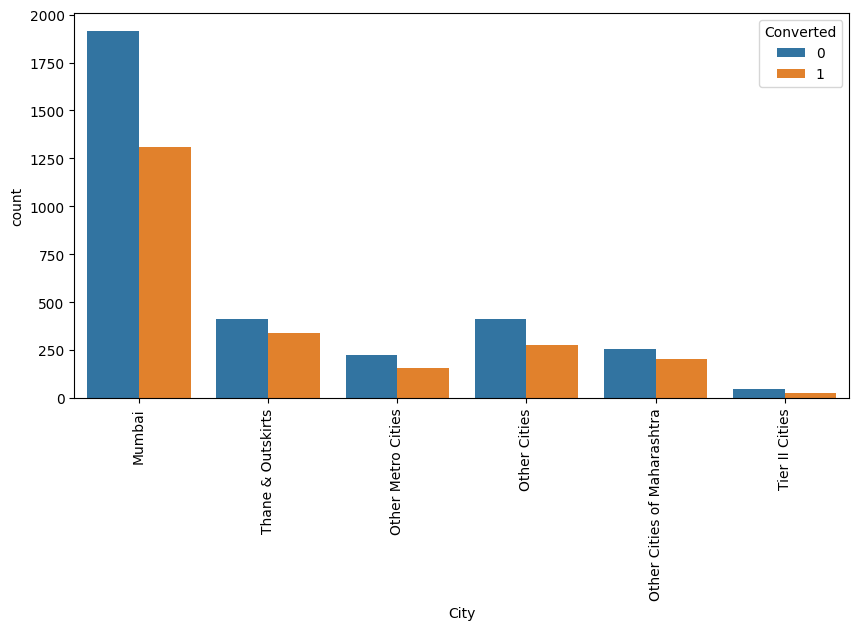

------------------------------------------------------------------------------------------------------------------------------------------------------




In [298]:
# City
show_value_counts_plot_vs_target(data_cleaned, "City", "Converted")

Mumbai has the most rows following by NaN. Hence we can impute missing values with Mumbai

In [299]:
data_cleaned['City'] = data_cleaned['City'].replace(np.nan,'Mumbai')

Variable under consideration: City


                             City  City_proportion
Mumbai                       6891            74.58
Thane & Outskirts             752             8.14
Other Cities                  686             7.42
Other Cities of Maharashtra   457             4.95
Other Metro Cities            380             4.11
Tier II Cities                 74             0.80


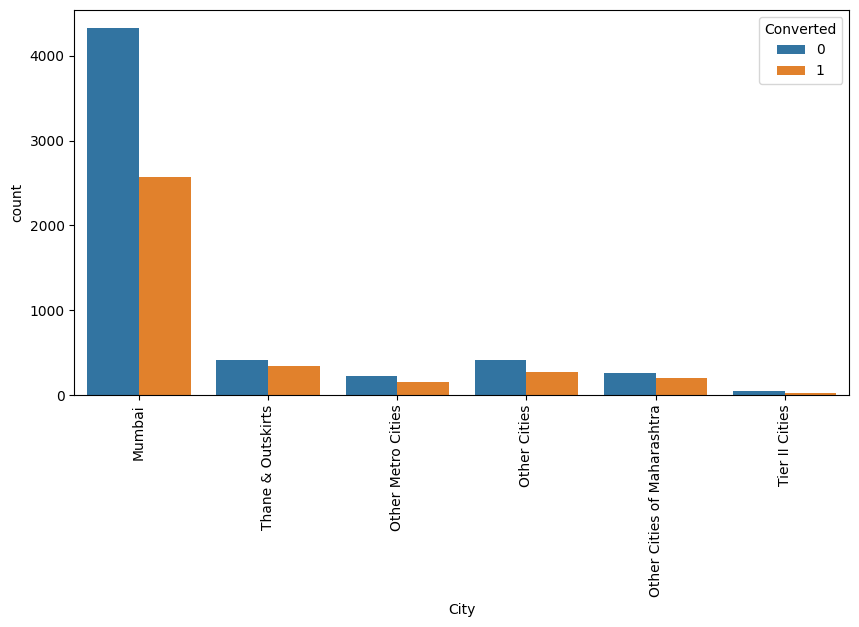

------------------------------------------------------------------------------------------------------------------------------------------------------




Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
City                                              0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [300]:
# Post imputation analysis for the variable and overall missing_value_info
show_value_counts_plot_vs_target(data_cleaned, "City", "Converted")
missing_value_info = round(100*(data_cleaned.isnull().sum()/len(data_cleaned)),2).sort_values(ascending=False)
missing_value_info

**Observations and Further Steps**

*   Through mumbai is the majority value, still other values contributes to 25%. Hence we will keep the variable

**Specialization**

Variable under consideration: Specialization


                                   Specialization  Specialization_proportion
NaN                                          3380                      36.58
Finance Management                            976                      10.56
Human Resource Management                     848                       9.18
Marketing Management                          838                       9.07
Operations Management                         503                       5.44
Business Administration                       403                       4.36
IT Projects Management                        366                       3.96
Supply Chain Management                       349                       3.78
Banking, Investment And Insurance             338                       3.66
Travel and Tourism                            203                       2.20
Media and Advertising                         203                       2.20
International Business       

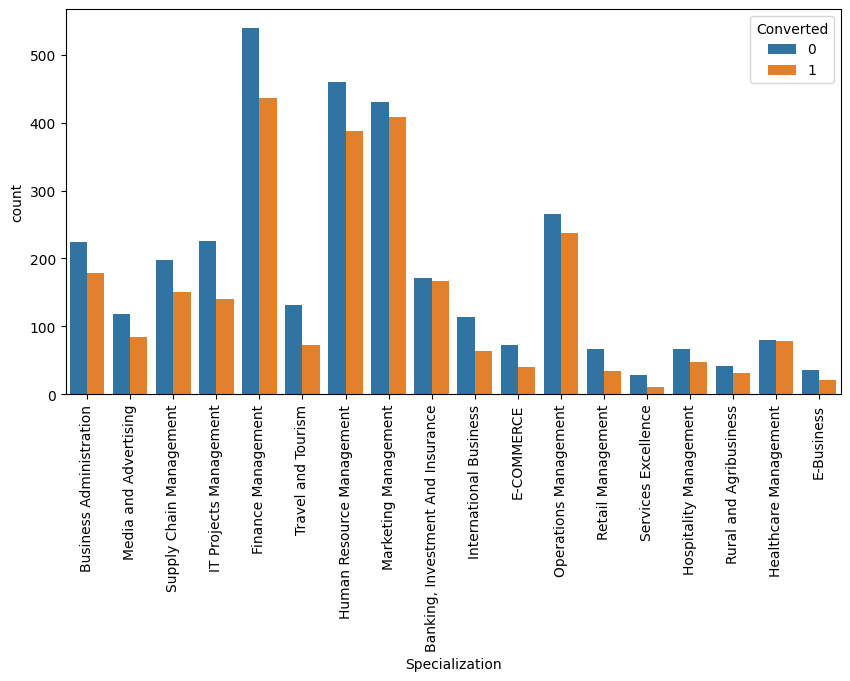

------------------------------------------------------------------------------------------------------------------------------------------------------




In [301]:
# Specialization
show_value_counts_plot_vs_target(data_cleaned, "Specialization", "Converted")

Since there is no specific majority class here, we can impute the nulls with "Not Given" value

In [302]:
data_cleaned['Specialization'] = data_cleaned['Specialization'].replace(np.nan, 'Not Given')

Variable under consideration: Specialization


                                   Specialization  Specialization_proportion
Not Given                                    3380                      36.58
Finance Management                            976                      10.56
Human Resource Management                     848                       9.18
Marketing Management                          838                       9.07
Operations Management                         503                       5.44
Business Administration                       403                       4.36
IT Projects Management                        366                       3.96
Supply Chain Management                       349                       3.78
Banking, Investment And Insurance             338                       3.66
Travel and Tourism                            203                       2.20
Media and Advertising                         203                       2.20
International Business       

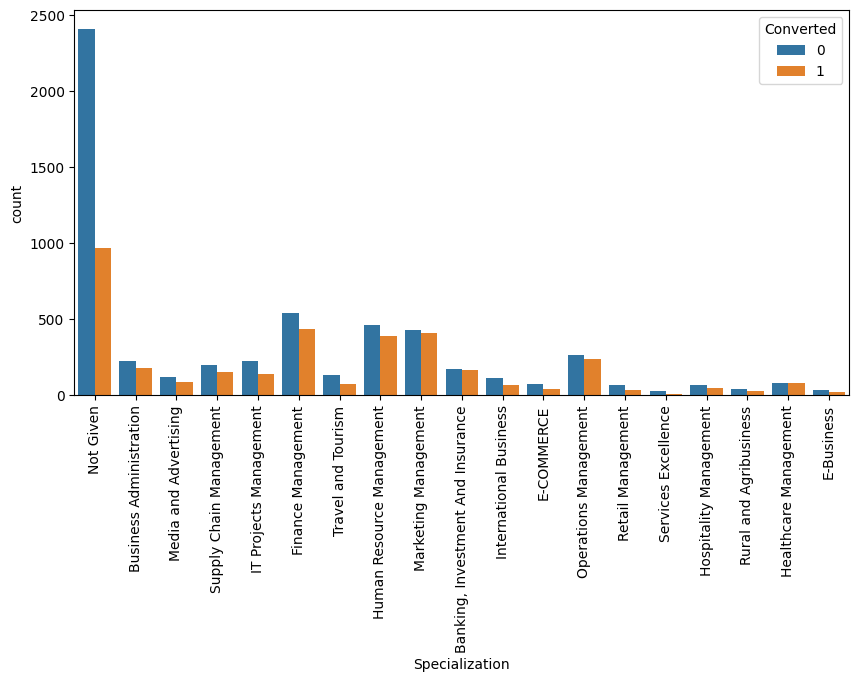

------------------------------------------------------------------------------------------------------------------------------------------------------




Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
City                                              0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Advertisement                             0.00
Search    

In [303]:
# Post imputation analysis for the variable and overall missing_value_info
show_value_counts_plot_vs_target(data_cleaned, "Specialization", "Converted")
# Updated missing_value_info post dropping a few columns
missing_value_info = round(100*(data_cleaned.isnull().sum()/len(data_cleaned)),2).sort_values(ascending=False)
missing_value_info

**Tags**

Variable under consideration: Tags


                                                   Tags  Tags_proportion
NaN                                                3353            36.29
Will revert after reading the email                2072            22.42
Ringing                                            1203            13.02
Interested in other courses                         513             5.55
Already a student                                   465             5.03
Closed by Horizzon                                  358             3.87
switched off                                        240             2.60
Busy                                                186             2.01
Lost to EINS                                        175             1.89
Not doing further education                         145             1.57
Interested  in full time MBA                        117             1.27
Graduation in progress                              111             1.20
invalid number

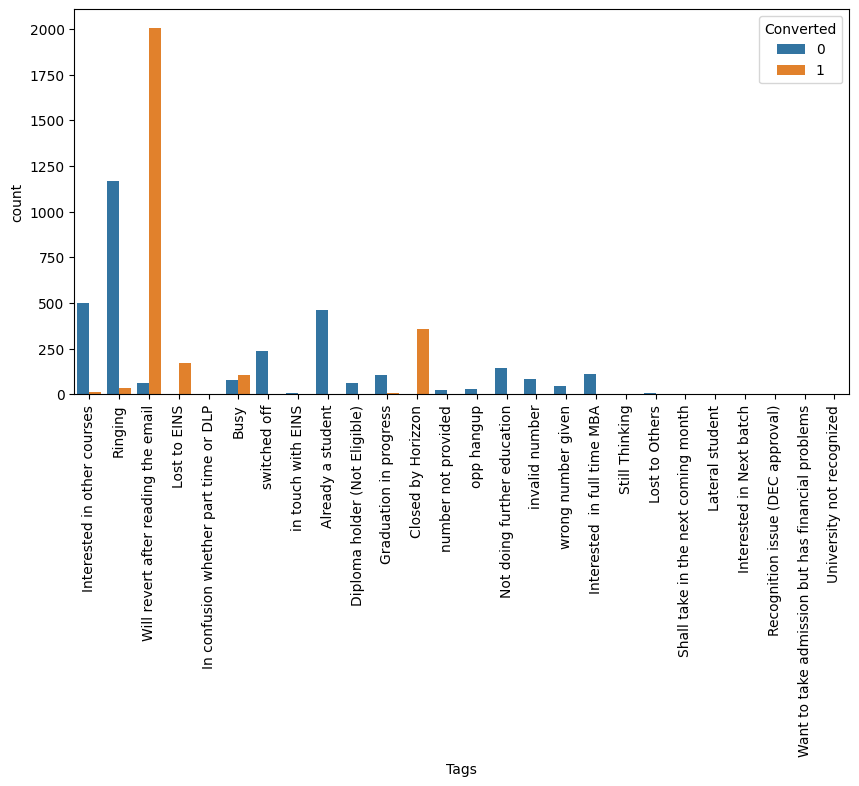

------------------------------------------------------------------------------------------------------------------------------------------------------




In [304]:
# Tags
show_value_counts_plot_vs_target(data_cleaned, "Tags", "Converted")

Based on the Definition of Tage, we can impute the nulls with "Not Given" value

In [305]:
data_cleaned['Tags'] = data_cleaned['Tags'].replace(np.nan, 'Not Given')

Variable under consideration: Tags


                                                   Tags  Tags_proportion
Not Given                                          3353            36.29
Will revert after reading the email                2072            22.42
Ringing                                            1203            13.02
Interested in other courses                         513             5.55
Already a student                                   465             5.03
Closed by Horizzon                                  358             3.87
switched off                                        240             2.60
Busy                                                186             2.01
Lost to EINS                                        175             1.89
Not doing further education                         145             1.57
Interested  in full time MBA                        117             1.27
Graduation in progress                              111             1.20
invalid number

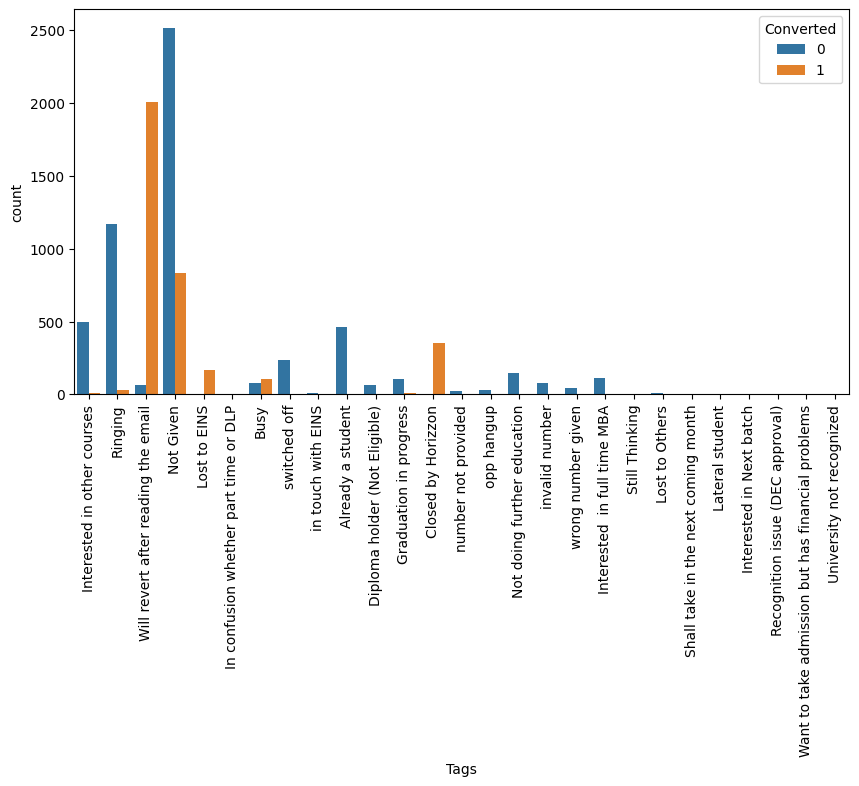

------------------------------------------------------------------------------------------------------------------------------------------------------




What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Tags                                              0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
City                                              0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Advertisement                             0.00
Search    

In [306]:
# Post imputation analysis for the variable and overall missing_value_info
show_value_counts_plot_vs_target(data_cleaned, "Tags", "Converted")
# Updated missing_value_info post dropping a few columns
missing_value_info = round(100*(data_cleaned.isnull().sum()/len(data_cleaned)),2).sort_values(ascending=False)
missing_value_info

**Observations and Further Steps**

* We have a lot of values with low proportion, we can combine it with Others. This will be done post all missing values are handled

**What matters most to you in choosing a course**

Variable under consideration: What matters most to you in choosing a course


                           What matters most to you in choosing a course  \
Better Career Prospects                                             6528   
NaN                                                                 2709   
Flexibility & Convenience                                              2   
Other                                                                  1   

                           What matters most to you in choosing a course_proportion  
Better Career Prospects                                                70.65         
NaN                                                                    29.32         
Flexibility & Convenience                                               0.02         
Other                                                                   0.01         


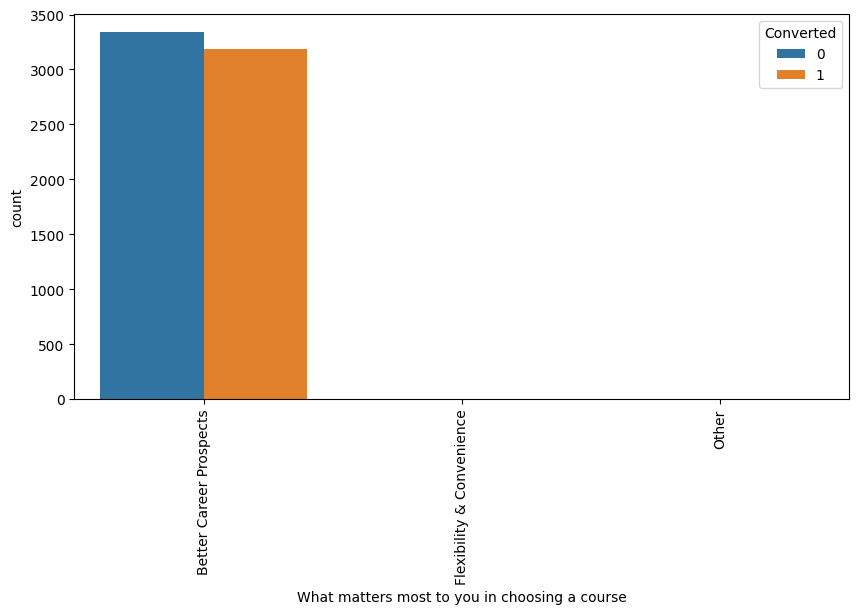

------------------------------------------------------------------------------------------------------------------------------------------------------




In [307]:
# What matters most to you in choosing a course
show_value_counts_plot_vs_target(data_cleaned, "What matters most to you in choosing a course", "Converted")

Better Career Prospects has the most rows following by NaN. Hence we can impute missing values with Better Career Prospects

In [308]:
data_cleaned['What matters most to you in choosing a course'] = data_cleaned['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

Variable under consideration: What matters most to you in choosing a course


                           What matters most to you in choosing a course  \
Better Career Prospects                                             9237   
Flexibility & Convenience                                              2   
Other                                                                  1   

                           What matters most to you in choosing a course_proportion  
Better Career Prospects                                                99.97         
Flexibility & Convenience                                               0.02         
Other                                                                   0.01         


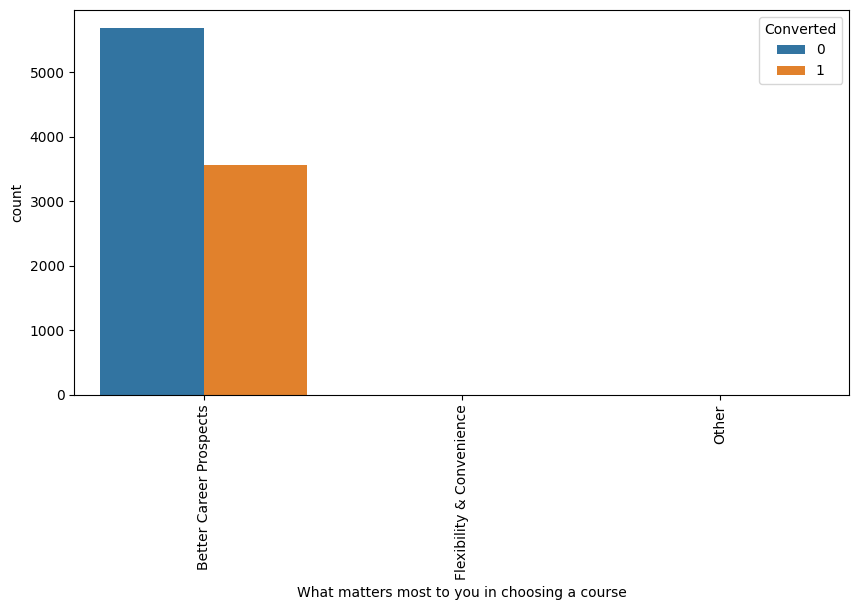

------------------------------------------------------------------------------------------------------------------------------------------------------




What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Tags                                              0.00
Prospect ID                                       0.00
X Education Forums                                0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
City                                              0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Newspaper                                         0.00
Search    

In [309]:
# Post imputation analysis for the variable and overall missing_value_info
show_value_counts_plot_vs_target(data_cleaned, "What matters most to you in choosing a course", "Converted")
missing_value_info = round(100*(data_cleaned.isnull().sum()/len(data_cleaned)),2).sort_values(ascending=False)
missing_value_info

**Observations and Further Steps**


* Since 99% of the values are Better Career Prospects post imputing, this will not give any varianace to the What matters most to you in choosing a course variable. Hence we can drop it

In [310]:
data_cleaned = data_cleaned.drop(["What matters most to you in choosing a course"], axis = 1)

**What is your current occupation**

Variable under consideration: What is your current occupation


                      What is your current occupation  \
Unemployed                                       5600   
NaN                                              2690   
Working Professional                              706   
Student                                           210   
Other                                              16   
Housewife                                          10   
Businessman                                         8   

                      What is your current occupation_proportion  
Unemployed                                                 60.61  
NaN                                                        29.11  
Working Professional                                        7.64  
Student                                                     2.27  
Other                                                       0.17  
Housewife                                                   0.11  
Businessma

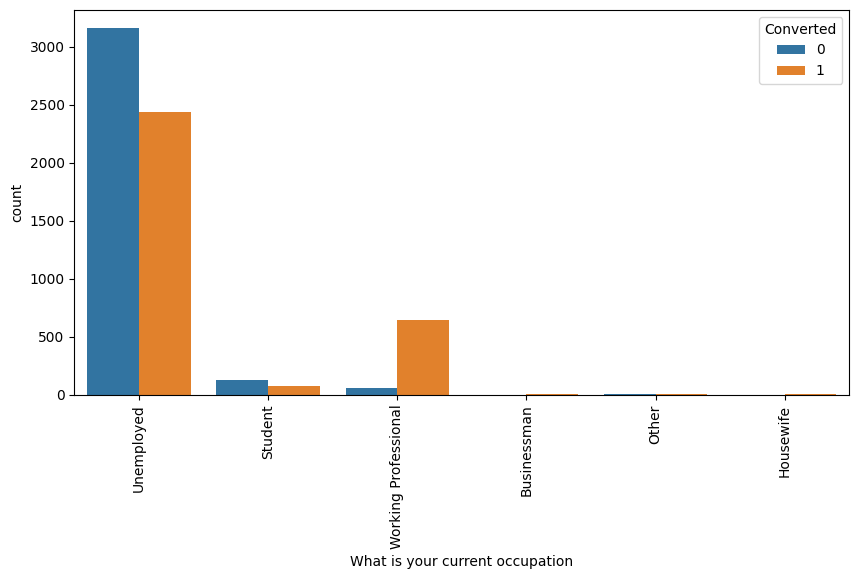

------------------------------------------------------------------------------------------------------------------------------------------------------




In [311]:
# What is your current occupation
show_value_counts_plot_vs_target(data_cleaned, "What is your current occupation", "Converted")

Based on the definition of What is your current occupation, we can impute the missing values with "Unemployed"

In [312]:
data_cleaned['What is your current occupation'] = data_cleaned['What is your current occupation'].replace(np.nan, 'Unemployed')

Variable under consideration: What is your current occupation


                      What is your current occupation  \
Unemployed                                       8290   
Working Professional                              706   
Student                                           210   
Other                                              16   
Housewife                                          10   
Businessman                                         8   

                      What is your current occupation_proportion  
Unemployed                                                 89.72  
Working Professional                                        7.64  
Student                                                     2.27  
Other                                                       0.17  
Housewife                                                   0.11  
Businessman                                                 0.09  


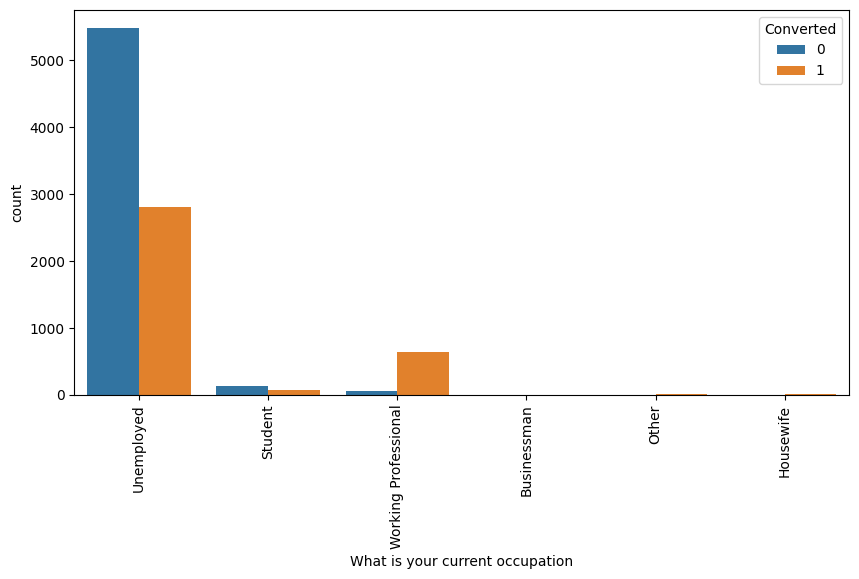

------------------------------------------------------------------------------------------------------------------------------------------------------




Country                                     26.63
TotalVisits                                  1.48
Page Views Per Visit                         1.48
Last Activity                                1.11
Lead Source                                  0.39
Prospect ID                                  0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00
Tags                                         0.00
Update me on Supply Chain Content            0.00
X Education Forums                           0.00
Get updates on DM Content                    0.00
City                                         0.00
I agree to pay the amount through cheque     0.00
A free copy of Mastering The Interview       0.00
Newspaper                                    0.00
Search                                       0.00
Newspaper Article                            0.00
Magazine                                     0.00


In [313]:
# Post imputation analysis for the variable and overall missing_value_info
show_value_counts_plot_vs_target(data_cleaned, "What is your current occupation", "Converted")
missing_value_info = round(100*(data_cleaned.isnull().sum()/len(data_cleaned)),2).sort_values(ascending=False)
missing_value_info

**Observations and Further Steps**

* Though the proportion of Unemployed is very high, but since employed people have higher changes of joining the courses, we will keep this variable

**Country**

Variable under consideration: Country


                      Country  Country_proportion
India                    6492               70.26
NaN                      2461               26.63
United States              69                0.75
United Arab Emirates       53                0.57
Singapore                  24                0.26
Saudi Arabia               21                0.23
United Kingdom             15                0.16
Australia                  13                0.14
Qatar                      10                0.11
Bahrain                     7                0.08
Hong Kong                   7                0.08
Oman                        6                0.06
France                      6                0.06
unknown                     5                0.05
Kuwait                      4                0.04
South Africa                4                0.04
Canada                      4                0.04
Nigeria                     4                0.04
Germany   

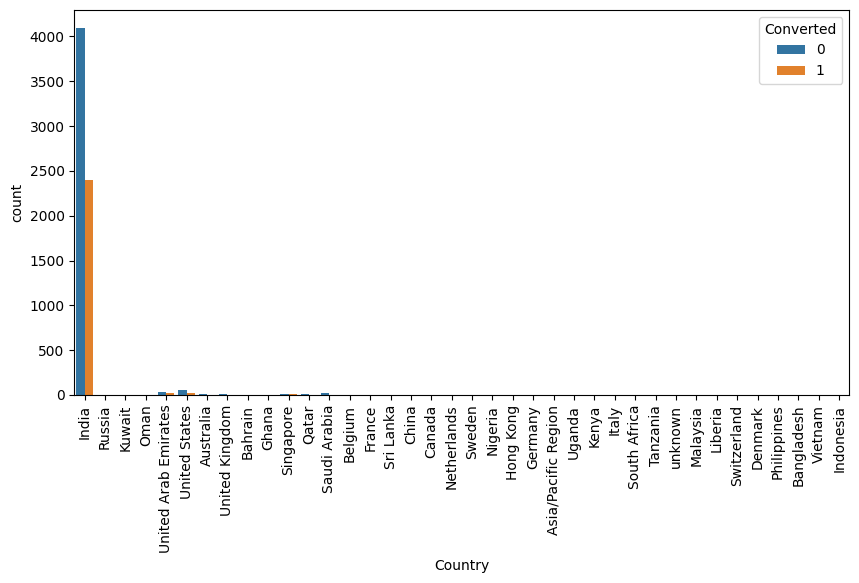

------------------------------------------------------------------------------------------------------------------------------------------------------




In [314]:
# What is your current occupation
show_value_counts_plot_vs_target(data_cleaned, "Country", "Converted")

India has the most rows followed by NaN. Hence we can impute missing values with India

In [315]:
data_cleaned['Country'] = data_cleaned['Country'].replace(np.nan, 'India')

Variable under consideration: Country


                      Country  Country_proportion
India                    8953               96.89
United States              69                0.75
United Arab Emirates       53                0.57
Singapore                  24                0.26
Saudi Arabia               21                0.23
United Kingdom             15                0.16
Australia                  13                0.14
Qatar                      10                0.11
Hong Kong                   7                0.08
Bahrain                     7                0.08
Oman                        6                0.06
France                      6                0.06
unknown                     5                0.05
South Africa                4                0.04
Nigeria                     4                0.04
Germany                     4                0.04
Kuwait                      4                0.04
Canada                      4                0.04
Sweden    

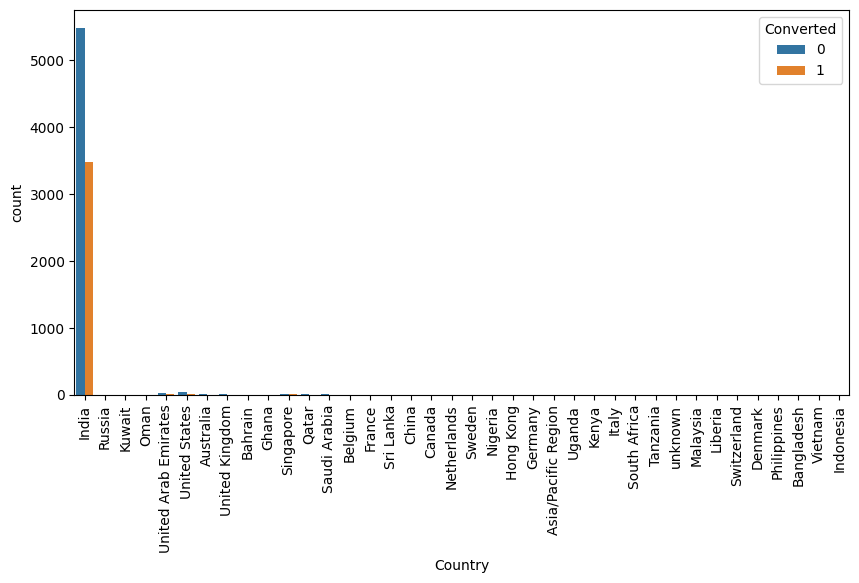

------------------------------------------------------------------------------------------------------------------------------------------------------




In [316]:
# Post imputation analysis for the variable
show_value_counts_plot_vs_target(data_cleaned, "Country", "Converted")

**Observations and Further Steps**

Since the proportion of Inida is very high (~96%), the country variable will not be much useful for the model due to very less variance. Hence we can drop it.

In [317]:
data_cleaned = data_cleaned.drop(["Country"], axis = 1)

In [318]:
# overall missing_value_info post all variables two digit missing value proportion handling
missing_value_info = round(100*(data_cleaned.isnull().sum()/len(data_cleaned)),2).sort_values(ascending=False)
missing_value_info

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
Lead Source                                 0.39
Prospect ID                                 0.00
X Education Forums                          0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
City                                        0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Tags                                        0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
Magazine                                    0.00
Newspaper Article                           0.00
Lead Number                                 0.00
Search                                      0.00
What is your current

Lets take a look at the remaining ctegorical/ordinal variables with missing values

**Last Activity**

Variable under consideration: Last Activity


                              Last Activity  Last Activity_proportion
Email Opened                           3437                     37.20
SMS Sent                               2745                     29.71
Olark Chat Conversation                 973                     10.53
Page Visited on Website                 640                      6.93
Converted to Lead                       428                      4.63
Email Bounced                           326                      3.53
Email Link Clicked                      267                      2.89
Form Submitted on Website               116                      1.26
NaN                                     103                      1.11
Unreachable                              93                      1.01
Unsubscribed                             61                      0.66
Had a Phone Conversation                 30                      0.32
Approached upfront                        9 

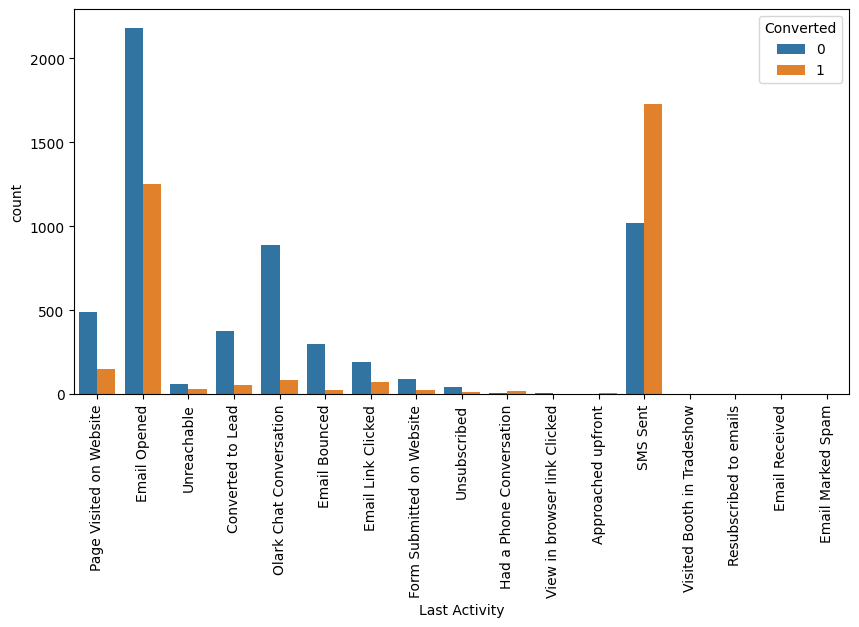

------------------------------------------------------------------------------------------------------------------------------------------------------




In [319]:
# Last activity
show_value_counts_plot_vs_target(data_cleaned, "Last Activity", "Converted")

Based on definition, we can impute the missing values as Others

In [320]:
data_cleaned['Last Activity'] = data_cleaned['Last Activity'].replace(np.nan, 'Others')

Variable under consideration: Last Activity


                              Last Activity  Last Activity_proportion
Email Opened                           3437                     37.20
SMS Sent                               2745                     29.71
Olark Chat Conversation                 973                     10.53
Page Visited on Website                 640                      6.93
Converted to Lead                       428                      4.63
Email Bounced                           326                      3.53
Email Link Clicked                      267                      2.89
Form Submitted on Website               116                      1.26
Others                                  103                      1.11
Unreachable                              93                      1.01
Unsubscribed                             61                      0.66
Had a Phone Conversation                 30                      0.32
Approached upfront                        9 

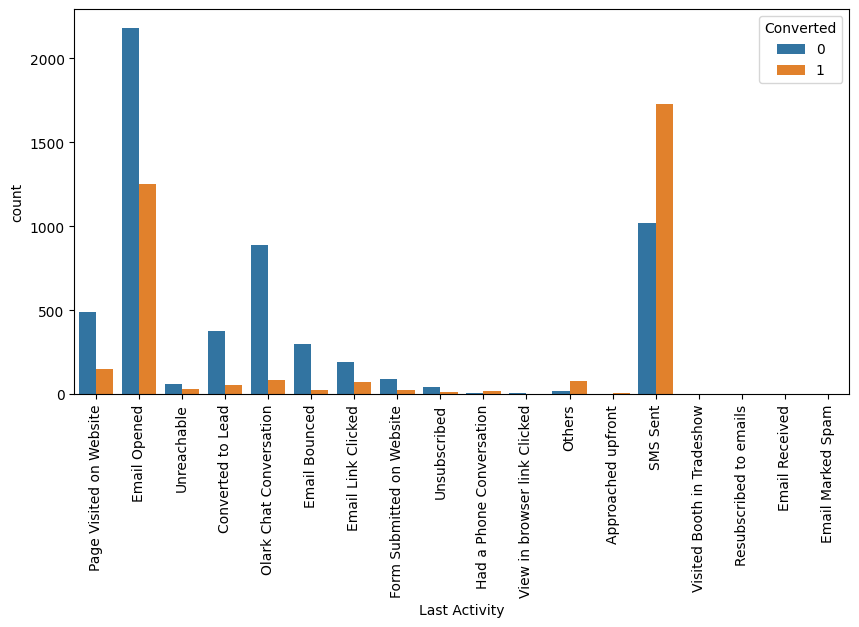

------------------------------------------------------------------------------------------------------------------------------------------------------




TotalVisits                                 1.48
Page Views Per Visit                        1.48
Lead Source                                 0.39
Prospect ID                                 0.00
X Education Forums                          0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
City                                        0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Tags                                        0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
Magazine                                    0.00
Newspaper Article                           0.00
Lead Number                                 0.00
Search                                      0.00
What is your current occupation             0.00
Specialization      

In [321]:
# Post imputation analysis for the variable and missing value info update
show_value_counts_plot_vs_target(data_cleaned, "Last Activity", "Converted")
missing_value_info = round(100*(data_cleaned.isnull().sum()/len(data_cleaned)),2).sort_values(ascending=False)
missing_value_info

**Observations and Further Steps**

* We have a lot of values with low proportion, we can combine it with Others. This will be done post all missing values are handled



**Lead Source**

Variable under consideration: Lead Source


                   Lead Source  Lead Source_proportion
Google                    2868                   31.04
Direct Traffic            2543                   27.52
Olark Chat                1755                   18.99
Organic Search            1154                   12.49
Reference                  534                    5.78
Welingak Website           142                    1.54
Referral Sites             125                    1.35
Facebook                    55                    0.60
NaN                         36                    0.39
bing                         6                    0.06
google                       5                    0.05
Click2call                   4                    0.04
Press_Release                2                    0.02
Social Media                 2                    0.02
Live Chat                    2                    0.02
youtubechannel               1                    0.01
testone              

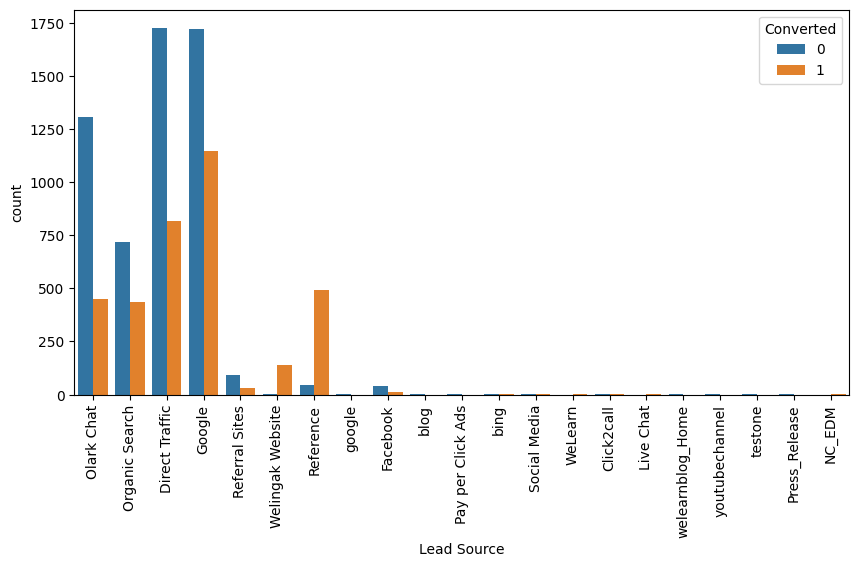

------------------------------------------------------------------------------------------------------------------------------------------------------




In [322]:
# Lead Source
show_value_counts_plot_vs_target(data_cleaned, "Lead Source", "Converted")

Based on definition, we can impute the missing values as Others

In [323]:
data_cleaned['Lead Source'] = data_cleaned['Lead Source'].replace(np.nan, 'Others')

Variable under consideration: Lead Source


                   Lead Source  Lead Source_proportion
Google                    2868                   31.04
Direct Traffic            2543                   27.52
Olark Chat                1755                   18.99
Organic Search            1154                   12.49
Reference                  534                    5.78
Welingak Website           142                    1.54
Referral Sites             125                    1.35
Facebook                    55                    0.60
Others                      36                    0.39
bing                         6                    0.06
google                       5                    0.05
Click2call                   4                    0.04
Press_Release                2                    0.02
Social Media                 2                    0.02
Live Chat                    2                    0.02
youtubechannel               1                    0.01
testone              

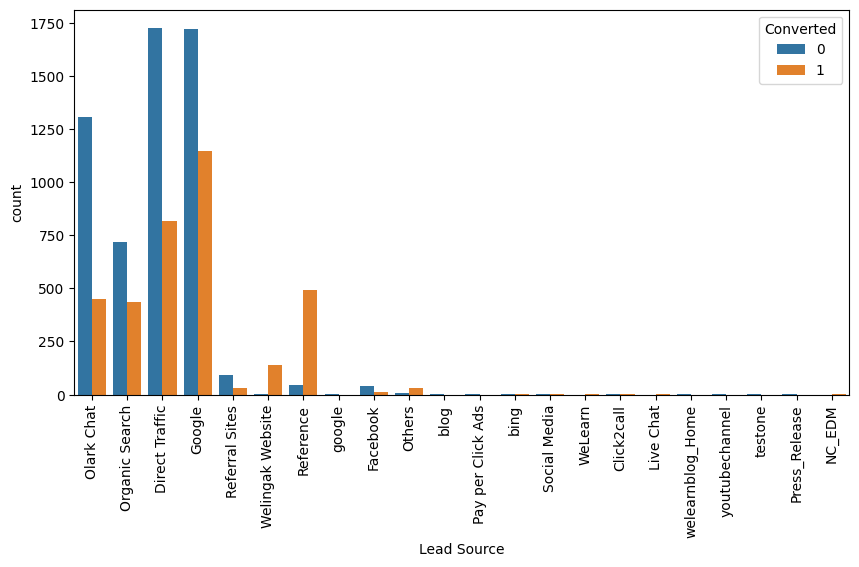

------------------------------------------------------------------------------------------------------------------------------------------------------




TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Newspaper Article                           0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
City                                        0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Tags                                        0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Magazine                                    0.00
Lead Number                                 0.00
Search                                      0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity       

In [324]:
# Post imputation analysis for the variable and missing value info update
show_value_counts_plot_vs_target(data_cleaned, "Lead Source", "Converted")
missing_value_info = round(100*(data_cleaned.isnull().sum()/len(data_cleaned)),2).sort_values(ascending=False)
missing_value_info

**Observations and Further Steps**

* We have a lot of values with low proportion, we can combine it with Others. This will be done post all missing values are handled

Let's look at the two continuos variables with missing values

**TotalVisits and Page Views Per Visit**

Since the percentage of missing values is lesser 2% (~185 records). We can drop these rows for modelling


In [325]:
data_cleaned = data_cleaned.dropna()

In [326]:
# overall missing_value_info post all variables two digit missing value proportion handling
missing_value_info = round(100*(data_cleaned.isnull().sum()/len(data_cleaned)),2).sort_values(ascending=False)
missing_value_info

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website             

**Dropping ID columns for further analysis**

In [327]:
data_cleaned = data_cleaned.drop(["Prospect ID", "Lead Number"], axis = 1)

## Cleaning Data:- Merging low proportion values together and dropping variables with very less variance

Variable under consideration: Lead Origin


                         Lead Origin  Lead Origin_proportion
Landing Page Submission         4886                   53.67
API                             3578                   39.31
Lead Add Form                    608                    6.68
Lead Import                       31                    0.34


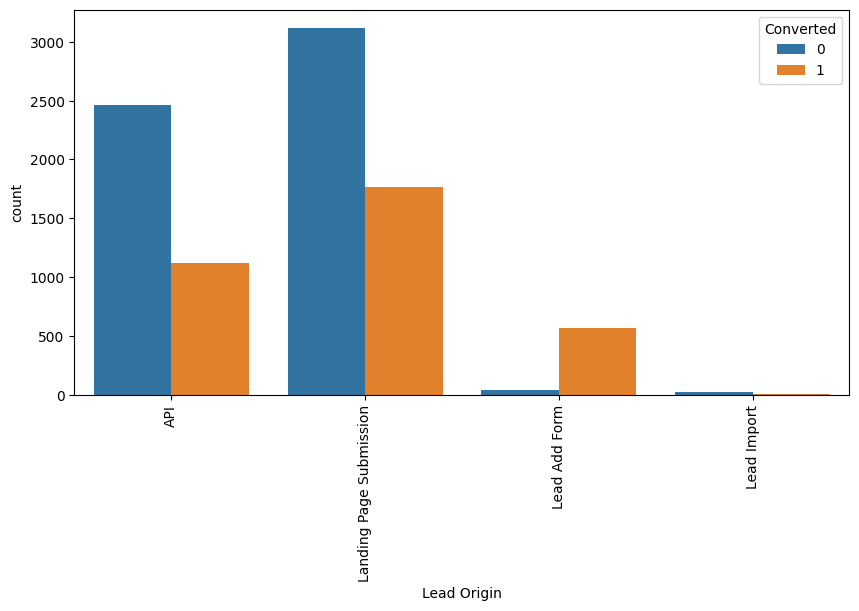

------------------------------------------------------------------------------------------------------------------------------------------------------


Variable under consideration: Lead Source


                   Lead Source  Lead Source_proportion
Google                    2868                   31.51
Direct Traffic            2543                   27.94
Olark Chat                1753                   19.26
Organic Search            1154                   12.68
Reference                  443                    4.87
Welingak Website           129                    1.42
Referral Sites             125                    1.37
Facebook                    31                    0.34
Others                      29                    0.32
bing                         6                    0.07
google                       5                    0.05
Click2call                   4                    0.04
Social Media                 2                    0.02
Live Chat                    2   

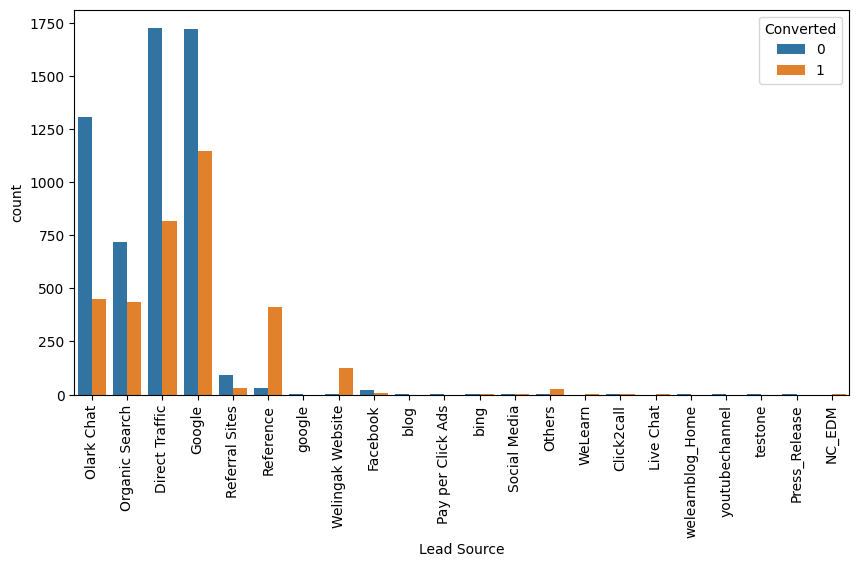

------------------------------------------------------------------------------------------------------------------------------------------------------


Variable under consideration: Do Not Email


     Do Not Email  Do Not Email_proportion
No           8379                    92.05
Yes           724                     7.95


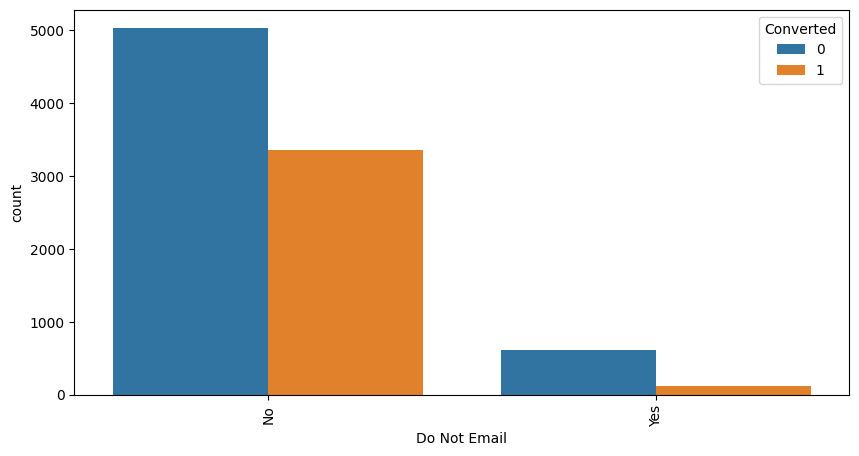

------------------------------------------------------------------------------------------------------------------------------------------------------


Variable under consideration: Do Not Call


     Do Not Call  Do Not Call_proportion
No          9101                   99.98
Yes            2                    0.02


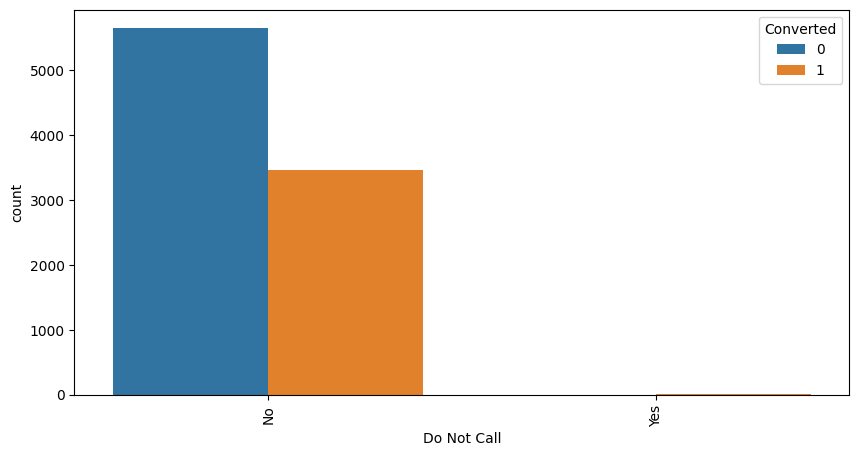

------------------------------------------------------------------------------------------------------------------------------------------------------


Variable under consideration: Last Activity


                              Last Activity  Last Activity_proportion
Email Opened                           3437                     37.76
SMS Sent                               2738                     30.08
Olark Chat Conversation                 972                     10.68
Page Visited on Website                 640                      7.03
Converted to Lead                       428                      4.70
Email Bounced                           312                      3.43
Email Link Clicked                      267                      2.93
Form Submitted on Website               116                      1.27
Unreachable                              90                      0.99
Unsubscribed                             61                      0.67
Had a Phone Conversation       

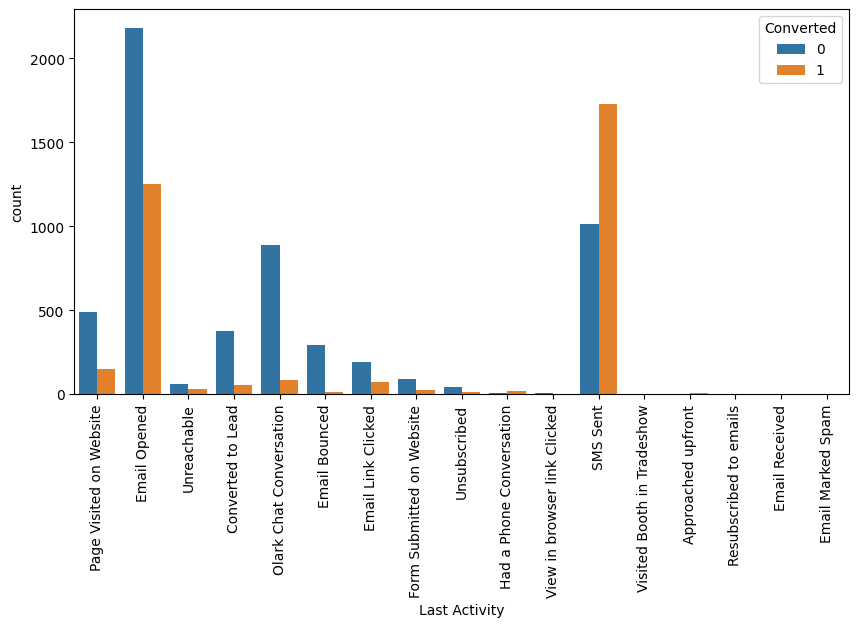

------------------------------------------------------------------------------------------------------------------------------------------------------


Variable under consideration: Specialization


                                   Specialization  Specialization_proportion
Not Given                                    3304                      36.30
Finance Management                            962                      10.57
Human Resource Management                     838                       9.21
Marketing Management                          824                       9.05
Operations Management                         500                       5.49
Business Administration                       399                       4.38
IT Projects Management                        366                       4.02
Supply Chain Management                       346                       3.80
Banking, Investment And Insurance             335                       3.68
Travel and Tourism            

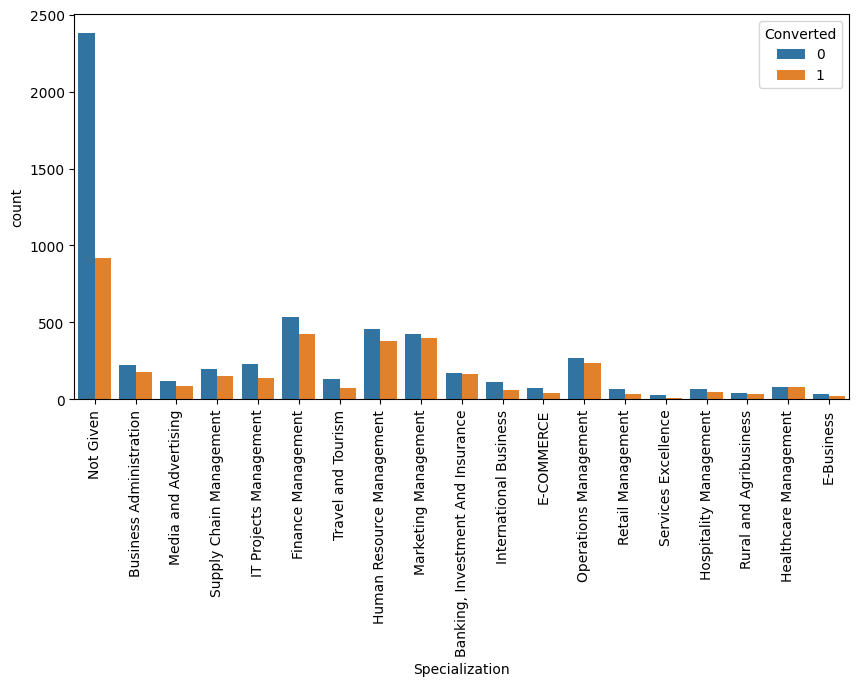

------------------------------------------------------------------------------------------------------------------------------------------------------


Variable under consideration: What is your current occupation


                      What is your current occupation  \
Unemployed                                       8185   
Working Professional                              679   
Student                                           207   
Other                                              15   
Housewife                                           9   
Businessman                                         8   

                      What is your current occupation_proportion  
Unemployed                                                 89.92  
Working Professional                                        7.46  
Student                                                     2.27  
Other                                                       0.16  
Housewife                                       

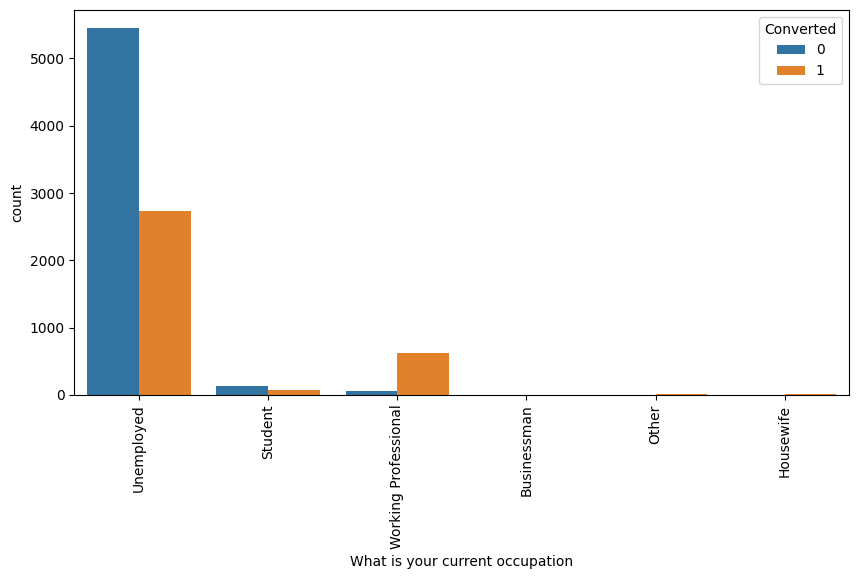

------------------------------------------------------------------------------------------------------------------------------------------------------


Variable under consideration: Search


     Search  Search_proportion
No     9089              99.85
Yes      14               0.15


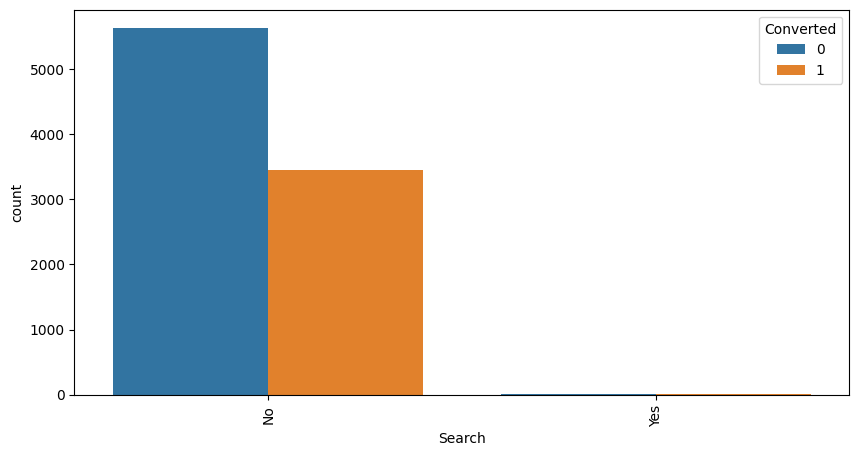

------------------------------------------------------------------------------------------------------------------------------------------------------


Variable under consideration: Magazine


    Magazine  Magazine_proportion
No      9103                100.0


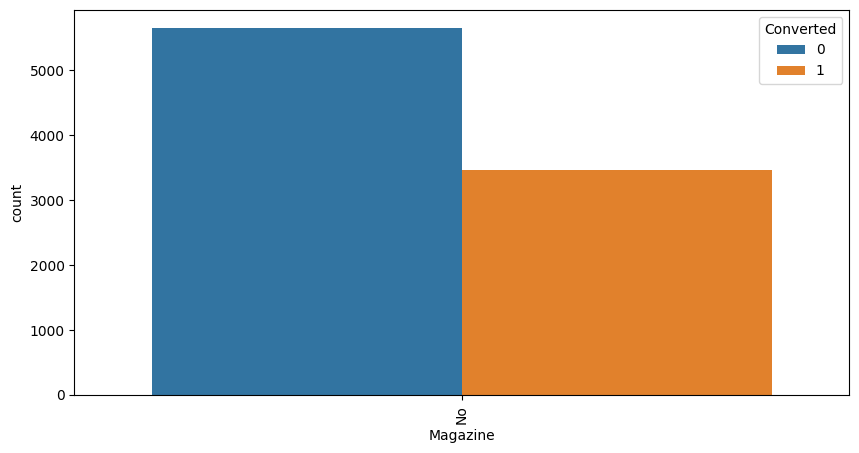

------------------------------------------------------------------------------------------------------------------------------------------------------


Variable under consideration: Newspaper Article


     Newspaper Article  Newspaper Article_proportion
No                9101                         99.98
Yes                  2                          0.02


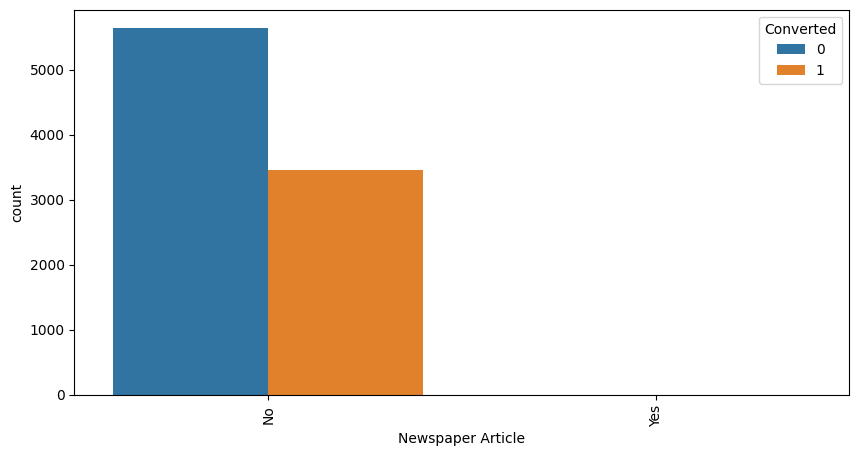

------------------------------------------------------------------------------------------------------------------------------------------------------


Variable under consideration: X Education Forums


     X Education Forums  X Education Forums_proportion
No                 9102                          99.99
Yes                   1                           0.01


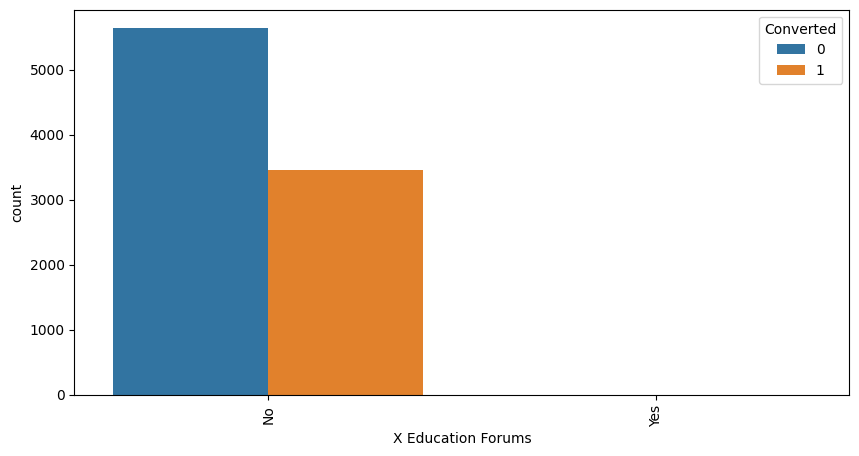

------------------------------------------------------------------------------------------------------------------------------------------------------


Variable under consideration: Newspaper


     Newspaper  Newspaper_proportion
No        9102                 99.99
Yes          1                  0.01


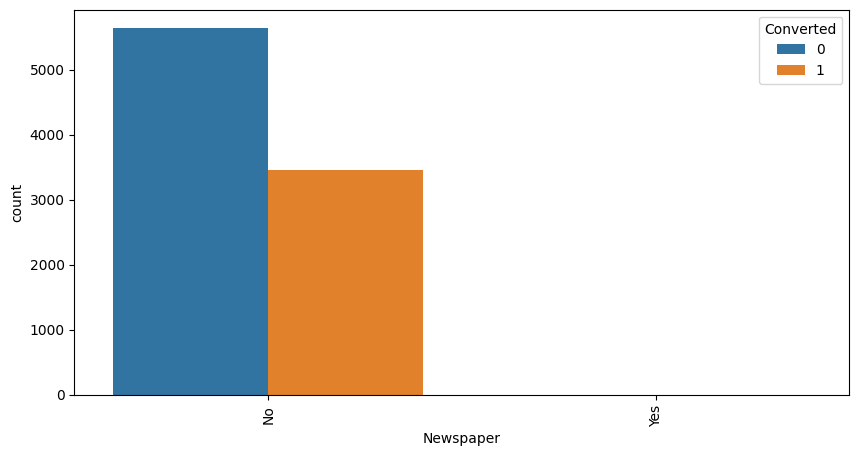

------------------------------------------------------------------------------------------------------------------------------------------------------


Variable under consideration: Digital Advertisement


     Digital Advertisement  Digital Advertisement_proportion
No                    9099                             99.96
Yes                      4                              0.04


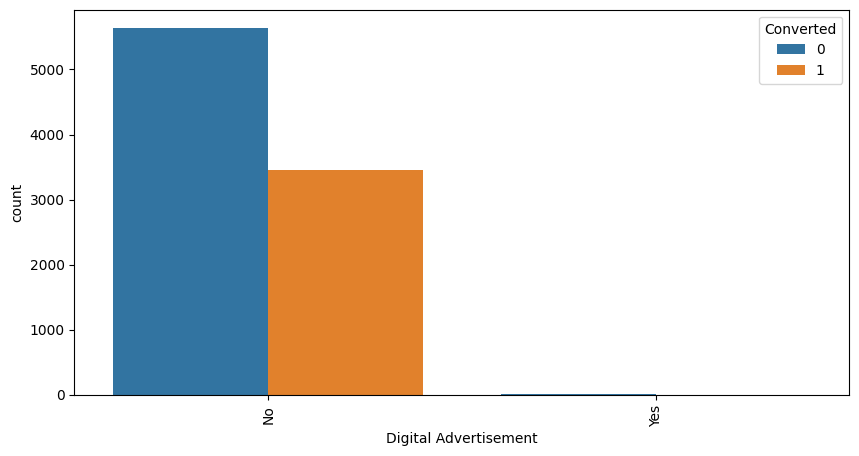

------------------------------------------------------------------------------------------------------------------------------------------------------


Variable under consideration: Through Recommendations


     Through Recommendations  Through Recommendations_proportion
No                      9096                               99.92
Yes                        7                                0.08


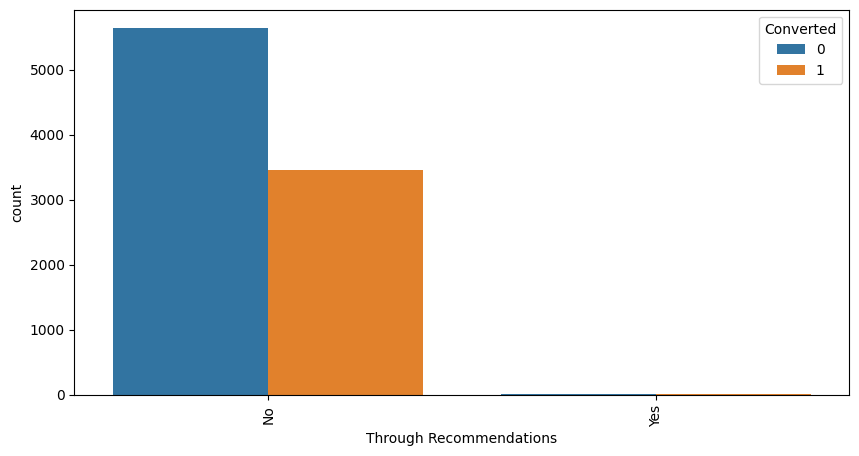

------------------------------------------------------------------------------------------------------------------------------------------------------


Variable under consideration: Receive More Updates About Our Courses


    Receive More Updates About Our Courses  \
No                                    9103   

    Receive More Updates About Our Courses_proportion  
No                                              100.0  


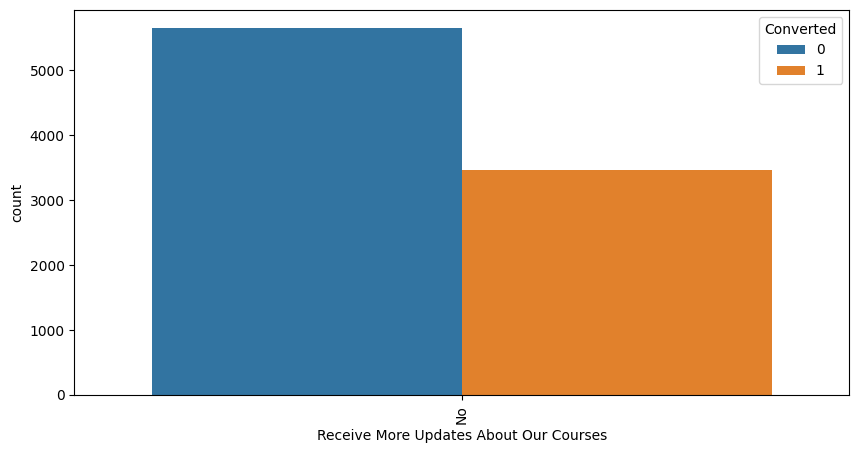

------------------------------------------------------------------------------------------------------------------------------------------------------


Variable under consideration: Tags


                                                   Tags  Tags_proportion
Not Given                                          3333            36.61
Will revert after reading the email                2035            22.36
Ringing                                            1189            13.06
Interested in other courses                         509             5.59
Already a student                                   465             5.11
Closed by Horizzon                                  301             3.31
switched off                                        240             2.64
Busy                                                185             2.03
Lost to EINS                                        173             1.90
Not doing further education                         145             1.59
Interes

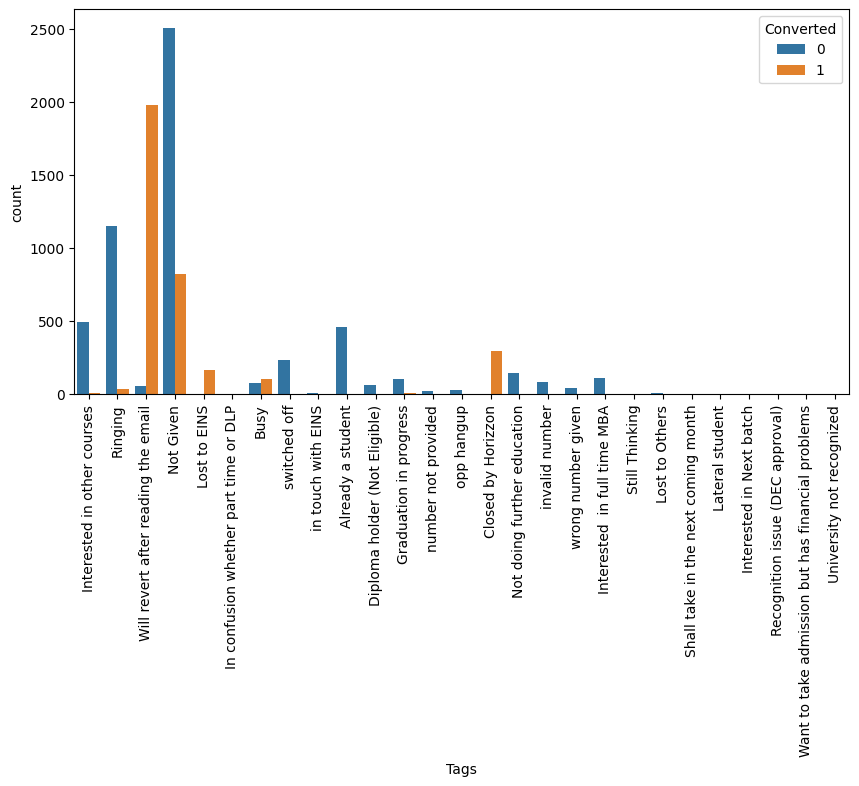

------------------------------------------------------------------------------------------------------------------------------------------------------


Variable under consideration: Update me on Supply Chain Content


    Update me on Supply Chain Content  \
No                               9103   

    Update me on Supply Chain Content_proportion  
No                                         100.0  


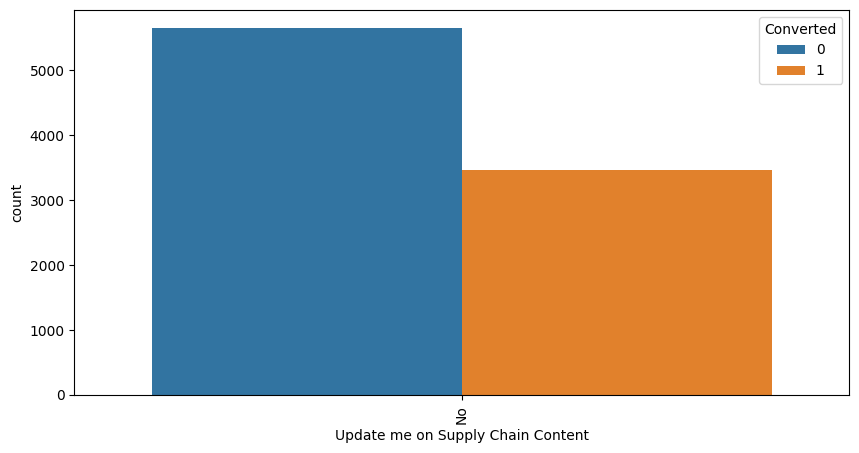

------------------------------------------------------------------------------------------------------------------------------------------------------


Variable under consideration: Get updates on DM Content


    Get updates on DM Content  Get updates on DM Content_proportion
No                       9103                                 100.0


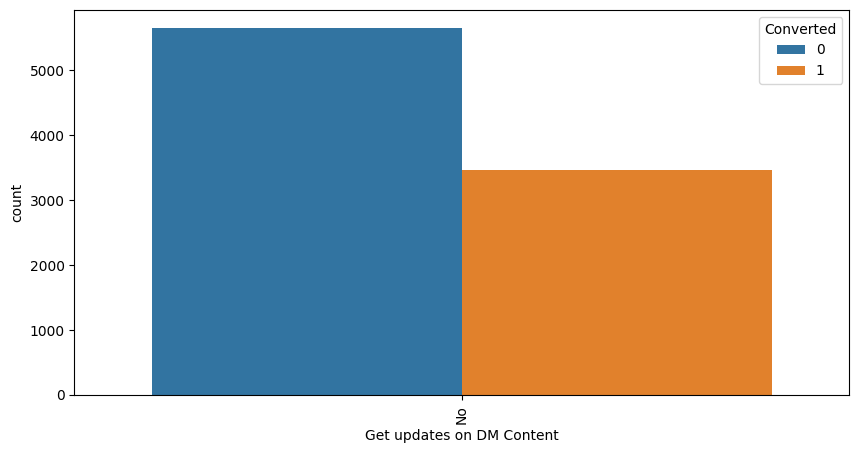

------------------------------------------------------------------------------------------------------------------------------------------------------


Variable under consideration: City


                             City  City_proportion
Mumbai                       6779            74.47
Thane & Outskirts             746             8.20
Other Cities                  680             7.47
Other Cities of Maharashtra   447             4.91
Other Metro Cities            377             4.14
Tier II Cities                 74             0.81


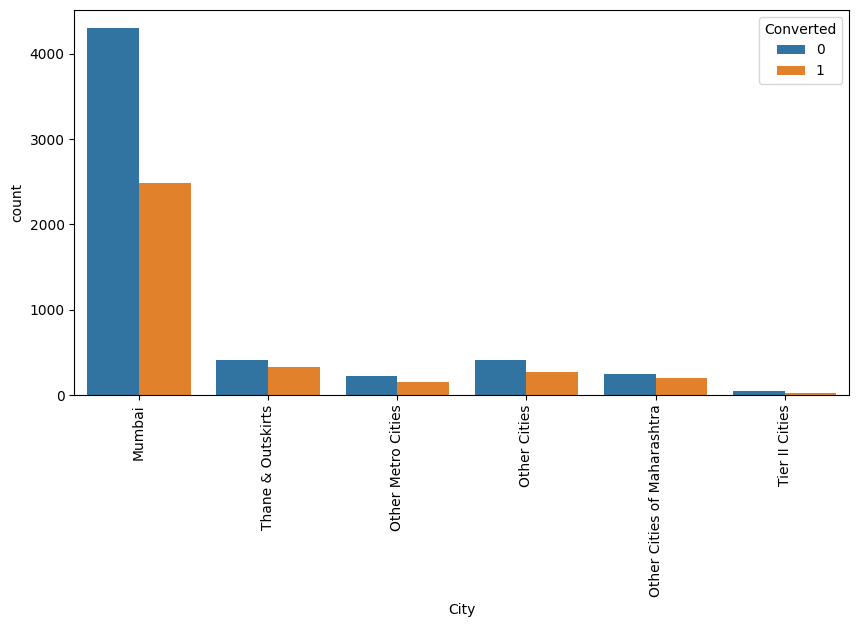

------------------------------------------------------------------------------------------------------------------------------------------------------


Variable under consideration: I agree to pay the amount through cheque


    I agree to pay the amount through cheque  \
No                                      9103   

    I agree to pay the amount through cheque_proportion  
No                                              100.0    


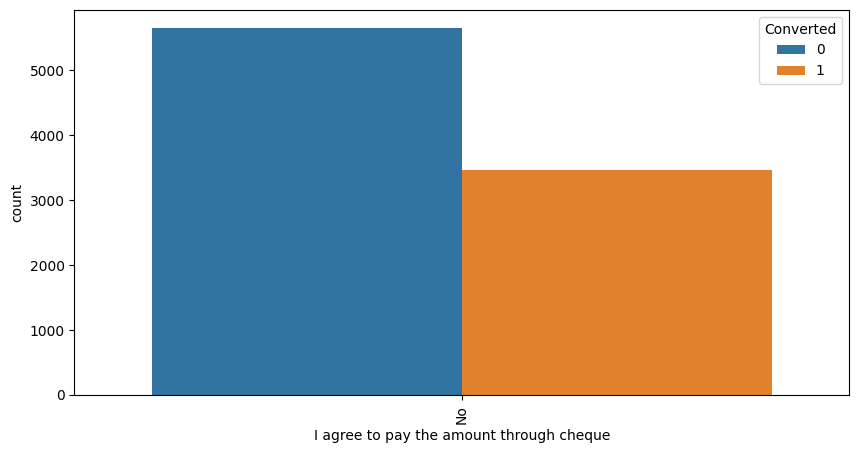

------------------------------------------------------------------------------------------------------------------------------------------------------


Variable under consideration: A free copy of Mastering The Interview


     A free copy of Mastering The Interview  \
No                                     6215   
Yes                                    2888   

     A free copy of Mastering The Interview_proportion  
No                                               68.27  
Yes                                              31.73  


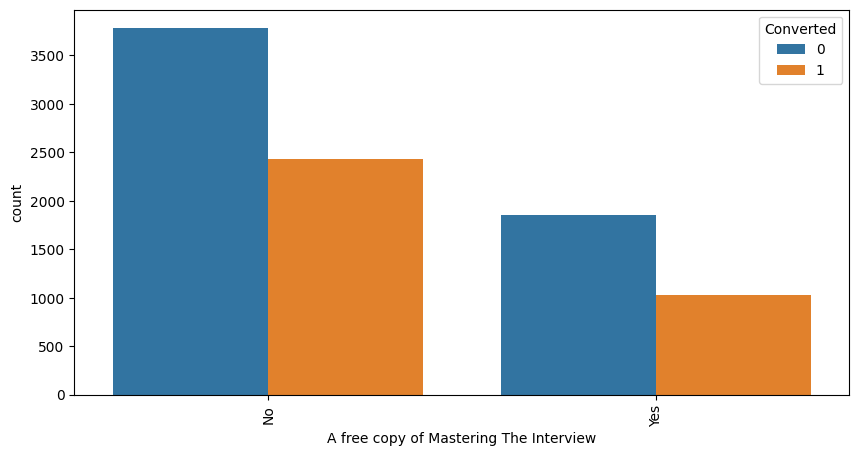

------------------------------------------------------------------------------------------------------------------------------------------------------


Variable under consideration: Last Notable Activity


                              Last Notable Activity  \
Modified                                       3270   
Email Opened                                   2827   
SMS Sent                                       2172   
Page Visited on Website                         318   
Olark Chat Conversation                         183   
Email Link Clicked                              173   
Email Bounced                                    60   
Unsubscribed                                     47   
Unreachable                                      32   
Had a Phone Conversation                         14   
Email Marked Spam                                 2   
Approached upfront                                1   
Resubscribed to emails                            1   
View in browser link Cl

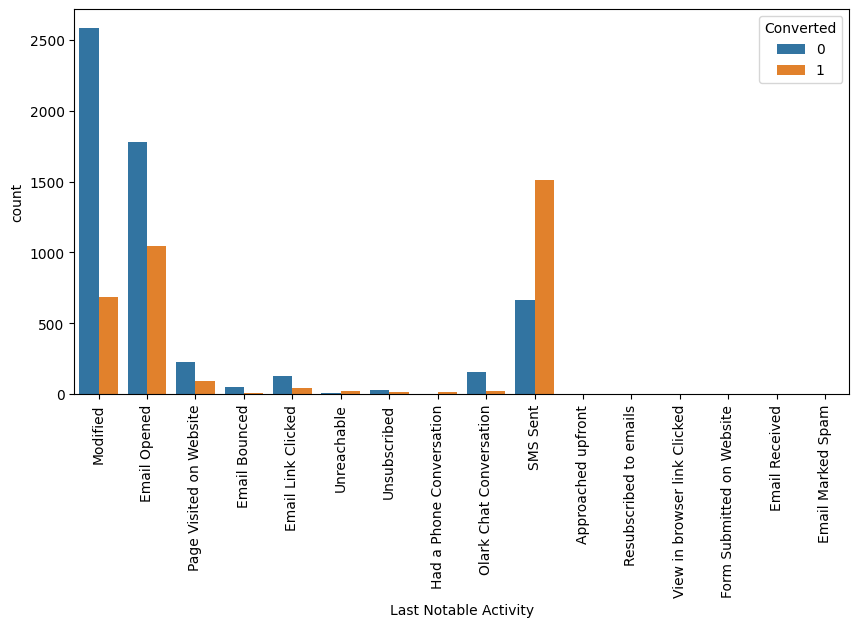

------------------------------------------------------------------------------------------------------------------------------------------------------




In [328]:
for column in data_cleaned:
  if(data_cleaned[column].dtype == "object"):
    show_value_counts_plot_vs_target(data_cleaned, column, "Converted", save = True)

In [329]:
# From the above Graphs, we will evaluate variables 1 by 1 to understand their importance

**Lead Origin**

* No change is required except for dummy creations.
* API and Landing Page submission generate the larger proportion of leads but the conversion rate is low.

**Lead Source**
* There are some duplications like Google and google, Facebook and social media. Which can be clubbed together
* Also a lot of sources have very low frequency which can be clubbed under Others. ( < 0.1)


In [330]:
data_cleaned['Lead Source'] = data_cleaned['Lead Source'].replace('google','Google')
data_cleaned['Lead Source'] = data_cleaned['Lead Source'].replace('Facebook','Social Media')
data_cleaned['Lead Source'] = data_cleaned['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                                    'youtubechannel','welearnblog_Home',
                                                                    'WeLearn','blog','Pay per Click Ads',
                                                                    'testone','NC_EDM'] ,'Others')

**Do Not Email**

* Doesn't need any change

**Do Not Call and other variables with no/very low variance**

*  More than 99% of the values are No, hence there is not varianace from which the model can learn. We can drop the variable
* On the same lines, other variables like Search, Magzine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque has more than 99% of same value. Hence these columns can also be dropped.

In [331]:
variables_to_drop = ['Do Not Call', 'Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                     'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                     'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [332]:
variables_to_drop.sort()

In [333]:
variables_to_drop

['Digital Advertisement',
 'Do Not Call',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Magazine',
 'Newspaper',
 'Newspaper Article',
 'Receive More Updates About Our Courses',
 'Search',
 'Through Recommendations',
 'Update me on Supply Chain Content',
 'X Education Forums']

In [334]:
data_cleaned = data_cleaned.drop(variables_to_drop, axis = 1)

**Last Activity**

* We can combine low occurring values into Others

In [335]:
data_cleaned['Last Activity'] = data_cleaned['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                                        'Had a Phone Conversation',
                                                                        'Approached upfront',
                                                                        'View in browser link Clicked',
                                                                        'Email Marked Spam',
                                                                        'Email Received','Resubscribed to emails',
                                                                        'Visited Booth in Tradeshow']
                                                                      ,'Others')

**Specialization**

* No changes required

**What is your current occupation**

* No changes required

**Tags**

* Replacing low frequency tags with Others

In [336]:
data_cleaned["Tags"] = data_cleaned["Tags"].replace(['in touch with EINS', 'opp hangup', 'Approached upfront',
                                                     'Diploma holder (Not Eligible)', 'Graduation in progress',
                                                     'In confusion whether part time or DLP', 'Interested in Next batch',
                                                     'Lateral student', 'Lost to Others', 'number not provided',
                                                     'Recognition issue (DEC approval)', 'Shall take in the next coming month',
                                                     'Still Thinking', 'University not recognized', 'Want to take admission but has financial problems'
                                                     ]
                                                    , "Others")

**City**

* No changes required

**A free copy of Mastering The Interview**

* No changes required

**Last Notable Activity**

* Replace less frequent values with Others

In [337]:
data_cleaned["Last Notable Activity"] = data_cleaned["Last Notable Activity"].replace(['Approached upfront', 'Email Bounced', 'Email Marked Spam',
                                                                                       'Email Received', 'Form Submitted on Website',
                                                                                       'Had a Phone Conversation', 'Resubscribed to emails',
                                                                                       'Unreachable', 'Unsubscribed',
                                                                                       'View in browser link Clicked']
                                                                                      ,'Others')

## Numerical Variable Analysis

In [338]:
# All numerical variables

for col in data_cleaned.columns:
  if(data_cleaned[col].dtype != "object"):
    print(col)

Converted
TotalVisits
Total Time Spent on Website
Page Views Per Visit


**Observations**
Along with with the Target variable (Converted) which is supposed to be binary/boolean, we have only 3 more numerical variables.

#### Univariate Analysis for Numeric variables

In [339]:
def plot_boxplot_and_describe_for_numerical_variable(df, col, save = False):
  print(f"Variable under consideration: {col}")
  plt.figure(figsize=(5,7))
  sns.boxplot(y=df[col])
  if(save == True):
    plt.savefig(f"{col}.png")
  plt.show()
  percentile_range = [0.05,.10,.25, .5, .75, .90, .95, .99]
  print(df[col].describe(percentiles = percentile_range))
  print(f"{'--'*75}")



**TotalVisits**

Variable under consideration: TotalVisits


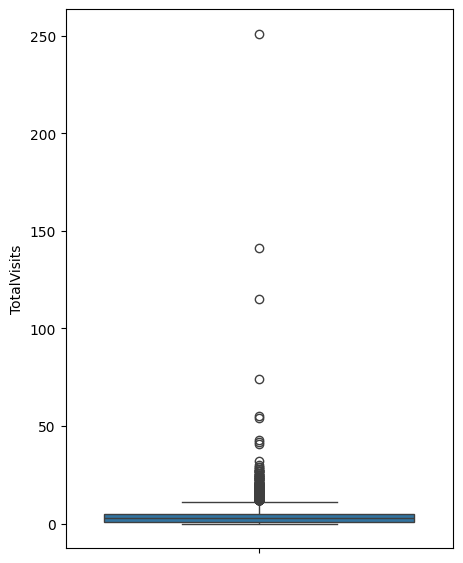

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------


In [340]:
plot_boxplot_and_describe_for_numerical_variable(data_cleaned, "TotalVisits", save = True)

**Total Time Spent on Website**

Variable under consideration: Total Time Spent on Website


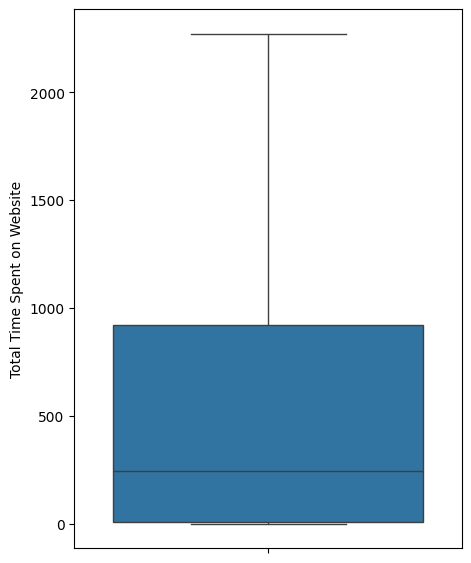

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
5%          0.000000
10%         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
95%      1556.900000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------


In [341]:
plot_boxplot_and_describe_for_numerical_variable(data_cleaned, "Total Time Spent on Website", save = True)

**Page Views Per Visit**

Variable under consideration: Page Views Per Visit


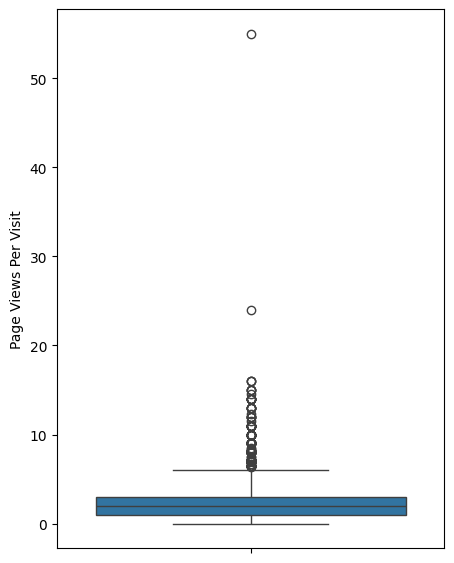

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
5%          0.000000
10%         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------


In [342]:
plot_boxplot_and_describe_for_numerical_variable(data_cleaned, "Page Views Per Visit", save = True)

**Observations and further steps**

* Total Time Spent on Website doesn't have any outliers
* TotalVisits and Page Views Per Visit is left skewed and the values above 99th percentile causes the issues. Hence lets cap the higher value at 99th percentile

In [343]:
percentile_99_TotalVisits = data_cleaned['TotalVisits'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['TotalVisits'] <= percentile_99_TotalVisits]

percentile_99_Page_Views_Per_Visit = data_cleaned['Page Views Per Visit'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['Page Views Per Visit'] <= percentile_99_Page_Views_Per_Visit]

Variable under consideration: TotalVisits


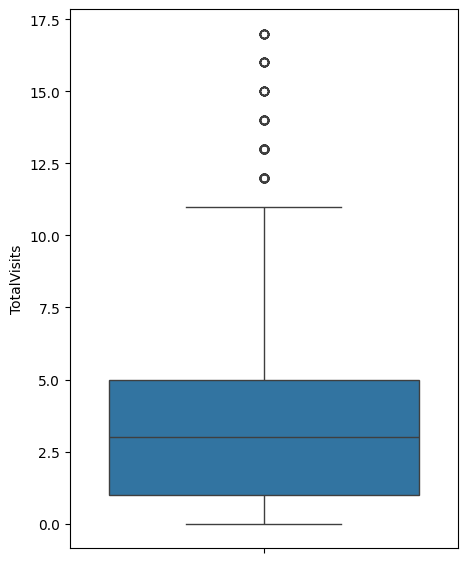

count    8953.000000
mean        3.143081
std         2.903799
min         0.000000
5%          0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        17.000000
Name: TotalVisits, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------
Variable under consideration: Page Views Per Visit


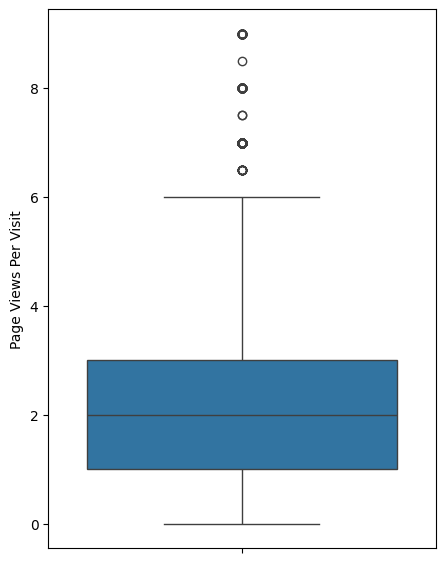

count    8953.000000
mean        2.266858
std         1.895221
min         0.000000
5%          0.000000
10%         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         8.000000
max         9.000000
Name: Page Views Per Visit, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------


In [344]:
# Post Outlier treatment plots
plot_boxplot_and_describe_for_numerical_variable(data_cleaned, "TotalVisits")
plot_boxplot_and_describe_for_numerical_variable(data_cleaned, "Page Views Per Visit")

**Converted**

Target value proportion

Variable under consideration: Converted


   Converted  Converted_proportion
0       5558                 62.08
1       3395                 37.92


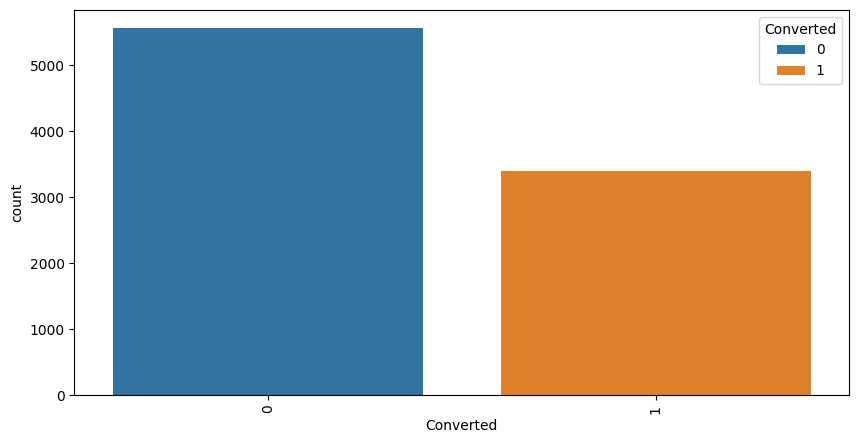

------------------------------------------------------------------------------------------------------------------------------------------------------




In [345]:
show_value_counts_plot_vs_target(data_cleaned, "Converted", "Converted", save = True)

#### Multi-variate Analysis for Numeric Variables

**TotalVisits, Total Time Spent on Website and Page Views Per Visit**

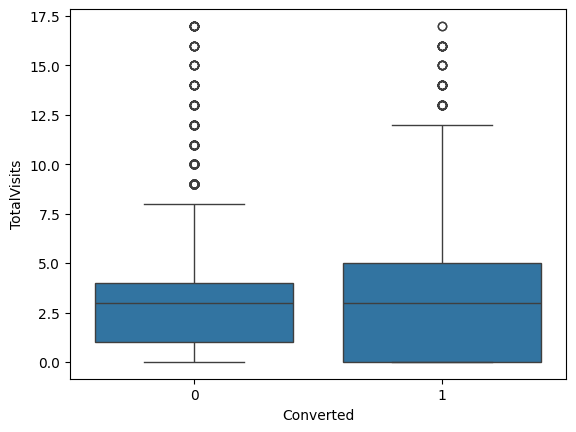

In [346]:
sns.boxplot(x = 'Converted', y = 'TotalVisits', data = data_cleaned)
plt.savefig("TotalVisits vs Converted.png")
plt.show()

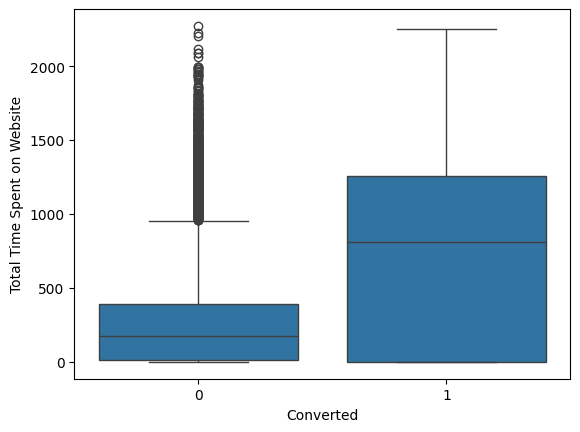

In [347]:
sns.boxplot(x = 'Converted', y = 'Total Time Spent on Website', data = data_cleaned)
plt.savefig("Total Time Spent on Website vs Converted.png")
plt.show()

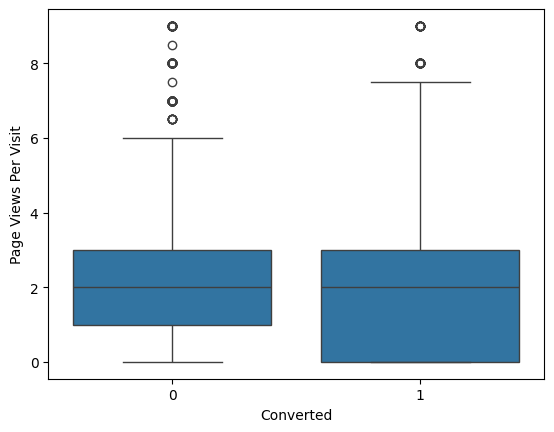

In [348]:
sns.boxplot(x = 'Converted', y = 'Page Views Per Visit', data = data_cleaned)
plt.savefig("Page Views Per Visit vs Converted.png")
plt.show()

**Observations**

* Nothing conclusive can be said on the basis of Total Visits, since the median of 1 and 0 are very close
* Nothing conclusive can be said on the basis of Page Views Per Visit, since the median of 1 and 0 are very close
* More time spent on website, leads to more conversion of leads, since the median of 1 is much larger than 0 for Total Time Spent on Website

**Correleation Heatmap between numerical variables and target variable**

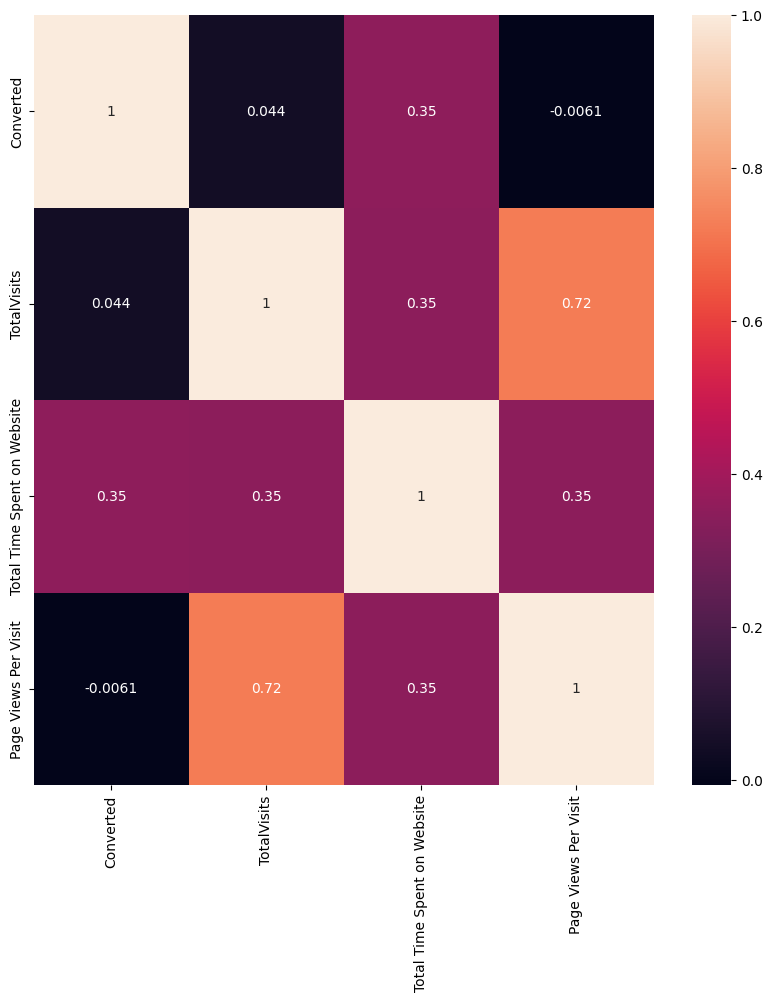

In [349]:
plt.figure(figsize=(10,10))

sns.heatmap(data_cleaned[["Converted", "TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]].corr(), annot=True)
plt.savefig("heatmap.png")
plt.show()

**Observations**
* Reaffirms the above observation, since the correlation between Total Time Spent on Website is the highest wrt Converted
* TotalVisits and Page Views Per Visit are highly correlated. We can use anyone of this variable, but lets wait for RFE results to be sure

# Dummy Variable creation

In [350]:
cat_cols = data_cleaned.loc[:, data_cleaned.dtypes == 'object'].columns

In [351]:
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [352]:
print("Unique Values")
for col in cat_cols:
  print(f"{col}: {data_cleaned[col].unique()}")
  print("\n")

Unique Values
Lead Origin: ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']


Lead Source: ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'Welingak Website' 'Social Media' 'Others' 'Live Chat']


Do Not Email: ['No' 'Yes']


Last Activity: ['Page Visited on Website' 'Email Opened' 'Others' 'Converted to Lead'
 'Olark Chat Conversation' 'Email Bounced' 'Email Link Clicked'
 'Form Submitted on Website' 'SMS Sent']


Specialization: ['Not Given' 'Business Administration' 'Media and Advertising'
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Travel and Tourism' 'Human Resource Management' 'Marketing Management'
 'Banking, Investment And Insurance' 'International Business' 'E-COMMERCE'
 'Operations Management' 'Retail Management' 'Services Excellence'
 'Hospitality Management' 'Rural and Agribusiness' 'Healthcare Management'
 'E-Business']


What is your current occupation: ['Unemployed' 'Student' 'Working Pr

Wherever we have Others, we will remove it for dummification.
For other variables, we will get_dummies and drop_first

In [353]:
# Variables without Others - drop_first = True
dummies_1 = pd.get_dummies(data_cleaned[["Lead Origin","City",
                                         "A free copy of Mastering The Interview", "Do Not Email"]]
                           , drop_first = True)
data_cleaned = pd.concat([data_cleaned, dummies_1], axis = 1)

In [354]:
dummies_2 = pd.get_dummies(data_cleaned[["Lead Source"]])
dummies_2.drop(["Lead Source_Others"], axis = 1, inplace = True)
data_cleaned = pd.concat([data_cleaned, dummies_2], axis = 1)

In [355]:
dummies_3 = pd.get_dummies(data_cleaned[["Last Activity"]])
dummies_3.drop(["Last Activity_Others"], axis = 1, inplace = True)
data_cleaned = pd.concat([data_cleaned, dummies_3], axis = 1)

In [356]:
dummies_4 = pd.get_dummies(data_cleaned[["Specialization"]])
dummies_4.drop(["Specialization_Not Given"], axis = 1, inplace = True)
data_cleaned = pd.concat([data_cleaned, dummies_4], axis = 1)

In [357]:
dummies_5 = pd.get_dummies(data_cleaned[["Tags"]])
dummies_5.drop(["Tags_Others"], axis = 1, inplace = True)
data_cleaned = pd.concat([data_cleaned, dummies_5], axis = 1)

In [358]:
dummies_6 = pd.get_dummies(data_cleaned[["Last Notable Activity"]])
dummies_6.drop(["Last Notable Activity_Others"], axis = 1, inplace = True)
data_cleaned = pd.concat([data_cleaned, dummies_6], axis = 1)

In [359]:
dummies_7 = pd.get_dummies(data_cleaned[["What is your current occupation"]])
dummies_7.drop(["What is your current occupation_Other"], axis = 1, inplace = True)
data_cleaned = pd.concat([data_cleaned, dummies_7], axis = 1)

In [360]:
# Dropping Raw columns
data_cleaned = data_cleaned.drop(cat_cols,axis = 1)

In [361]:
# Columns post dummification
print(f"Number of columns in data_cleaned: {len(data_cleaned.columns)}\n")
print(data_cleaned.columns)


Number of columns in data_cleaned: 73

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'A free copy of Mastering The Interview_Yes',
       'Do Not Email_Yes', 'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_

# Train Test Split and Numerical variables scaling for Modelling

**Train Test Split**

In [362]:
# Getting X and y from the dataframe
y = data_cleaned['Converted']
X = data_cleaned.drop('Converted', axis=1)

In [363]:
# Splitting the data into train and test (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=94)

In [364]:
scaler = StandardScaler()
numerical_cols = X_train.select_dtypes(include=['float', 'int']).columns
scaler.fit(X_train[numerical_cols])
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])

# Logistic Regression modelling

## Some functions for modular codes

In [365]:
def build_model_statsmodels(X_train, cols, y_train):
  """
  Function to build Binary Logistic Regression model using statsmodels api
  """
  X_train_sm = sm.add_constant(X_train[cols])
  logit_sm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
  print(logit_sm.summary())
  return logit_sm

In [366]:
def calculate_vif(X_train, cols):
  """
  Function to calculate VIF for a given features and training data
  """
  df = X_train[cols]
  vif = pd.DataFrame()
  vif['Features'] = df.columns
  vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  vif['VIF'] = round(vif['VIF'],2)
  vif = vif.sort_values(by='VIF',ascending=False)
  return vif

In [367]:
def build_model_sklearn(X_train, cols, y_train):
  """
  Function to build Binary Logistic Regression model using scikit Learn library
  """
  logit_sk = LogisticRegression()
  logit_sk.fit(X_train[cols], y_train)
  return logit_sk

In [368]:
def binary_class_model_performance(actuals, predictions, prediction_probs):
  """
  Function to get all important performance metrics of a binary class model
  """
  confusion_matrix_obj = confusion_matrix(actuals, predictions)
  print(f"Confusion Matrix\n{confusion_matrix_obj}\n\n")

  # Accuracy
  print(f"Accuracy: {accuracy_score(actuals, predictions)}\n\n")

  # Precision
  print(f"Precision: {precision_score(actuals, predictions)}\n\n")

  # Recall
  print(f"Recall or Sensitivity (TPR): {recall_score(actuals, predictions)}\n\n")

  # Confusion Matrix based metrics

  # true positive
  TP = confusion_matrix_obj[1,1]

  # true negatives
  TN = confusion_matrix_obj[0,0]

  # false positives
  FP = confusion_matrix_obj[0,1]

  # false negatives
  FN = confusion_matrix_obj[1,0]


  # Specificity
  specificity = TN / float(TN+FP)
  print(f"Specificity: {specificity}\n\n")

  #ROC_AUC_score
  print(f"ROC_AUC_score: {roc_auc_score(actuals, prediction_probs)}\n\n")

  print(f"{'-'*75}")

## Automated Feature elimination using Recursive Feature Elimination

For this we need sklearn version of Logistic Regression to make it compatible Out of 73 variables available, lets select 15 variables

In [369]:
logit_model = LogisticRegression()

In [370]:
#RFE  to select 15 variables
rfe_obj = RFE(logit_model, n_features_to_select = 15)
rfe_obj.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [371]:
list(zip(X_train.columns, rfe_obj.support_, rfe_obj.ranking_))

[('TotalVisits', False, 37),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 36),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 55),
 ('City_Other Cities', False, 39),
 ('City_Other Cities of Maharashtra', False, 56),
 ('City_Other Metro Cities', False, 26),
 ('City_Thane & Outskirts', False, 52),
 ('City_Tier II Cities', False, 43),
 ('A free copy of Mastering The Interview_Yes', False, 44),
 ('Do Not Email_Yes', False, 9),
 ('Lead Source_Direct Traffic', False, 3),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Live Chat', False, 57),
 ('Lead Source_Olark Chat', False, 27),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Reference', False, 18),
 ('Lead Source_Referral Sites', False, 6),
 ('Lead Source_Social Media', False, 40),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 12),
 ('Last Activity_Email Bounced', False, 2

We will select the columns where rfe_support_ is True

In [372]:
selected_col_m0 = list(X_train.columns[rfe_obj.support_])
print(f"Columns selected based on RFE \n {selected_col_m0}")

Columns selected based on RFE 
 ['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Already a student', 'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA', 'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given', 'Last Notable Activity_Modified']


In [373]:
print(f"Columns eliminated based on RFE \n {list(X_train.columns[~rfe_obj.support_])}")

Columns eliminated based on RFE 
 ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import', 'City_Other Cities', 'City_Other Cities of Maharashtra', 'City_Other Metro Cities', 'City_Thane & Outskirts', 'City_Tier II Cities', 'A free copy of Mastering The Interview_Yes', 'Do Not Email_Yes', 'Lead Source_Direct Traffic', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website', 'Specialization_Banking, Investment And Insurance', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Spec

## Model Selection - Manual Feature Elimination

### Model 1

In [374]:
print(f"Running Model with the following features: {selected_col_m0}")
model_1 = build_model_statsmodels(X_train, selected_col_m0, y_train)
calculate_vif(X_train, selected_col_m0)

Running Model with the following features: ['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Already a student', 'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA', 'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given', 'Last Notable Activity_Modified']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7162
Model:                            GLM   Df Residuals:                     7146
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1584.5
Date:                Mon, 25 Mar 2024   Devianc

,Features,VIF
1,Lead Source_Welingak Website,1.31
4,Tags_Closed by Horizzon,1.17
7,Tags_Lost to EINS,1.04
8,Tags_Not doing further education,1.03
5,Tags_Interested in full time MBA,1.02
12,Tags_switched off,1.02
11,Tags_invalid number,1.01
13,Tags_wrong number given,1.01
0,Lead Origin_Lead Add Form,0.75
6,Tags_Interested in other courses,0.42


Dropping "Tags_wrong number given" since it has a high p_val of 0.999

In [375]:
selected_col_m1 = selected_col_m0.copy()
selected_col_m1.remove("Tags_wrong number given")

### Model 2

In [376]:
print(f"Running Model with the following features: {selected_col_m1}")
model_2 = build_model_statsmodels(X_train, selected_col_m1, y_train)
calculate_vif(X_train, selected_col_m1)

Running Model with the following features: ['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Already a student', 'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA', 'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_invalid number', 'Tags_switched off', 'Last Notable Activity_Modified']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7162
Model:                            GLM   Df Residuals:                     7147
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1602.8
Date:                Mon, 25 Mar 2024   Deviance:                       32

,Features,VIF
1,Lead Source_Welingak Website,1.31
4,Tags_Closed by Horizzon,1.17
7,Tags_Lost to EINS,1.04
8,Tags_Not doing further education,1.03
5,Tags_Interested in full time MBA,1.02
12,Tags_switched off,1.02
11,Tags_invalid number,1.01
0,Lead Origin_Lead Add Form,0.75
6,Tags_Interested in other courses,0.42
3,Tags_Already a student,0.31


Dropping "Lead Origin_Lead Add Form" since it has a moderately p_val of 0.023

In [377]:
selected_col_m2 = selected_col_m1.copy()
selected_col_m2.remove("Lead Origin_Lead Add Form")

### Model 3

In [378]:
print(f"Running Model with the following features: {selected_col_m2}")
model_3 = build_model_statsmodels(X_train, selected_col_m2, y_train)
calculate_vif(X_train, selected_col_m2)

Running Model with the following features: ['Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Already a student', 'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA', 'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_invalid number', 'Tags_switched off', 'Last Notable Activity_Modified']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7162
Model:                            GLM   Df Residuals:                     7148
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1605.5
Date:                Mon, 25 Mar 2024   Deviance:                       3210.9
Time:                   

,Features,VIF
3,Tags_Closed by Horizzon,1.05
0,Lead Source_Welingak Website,1.03
6,Tags_Lost to EINS,1.03
7,Tags_Not doing further education,1.03
4,Tags_Interested in full time MBA,1.02
11,Tags_switched off,1.02
10,Tags_invalid number,1.01
5,Tags_Interested in other courses,0.42
2,Tags_Already a student,0.31
8,Tags_Ringing,0.18


Al the p-values are low and the VIF factors are also low, hence we can free this model

In [379]:
final_model = model_3

## Model Evaluation

In [380]:
final_model

In [381]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = final_model.predict(sm.add_constant(X_train[selected_col_m2]))
y_train_pred = y_train_pred.values.reshape(-1)

In [382]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_df = pd.DataFrame({'Actual':y_train.values, 'Prediction_prob':y_train_pred})
y_train_pred_df.insert(0, 'Prospect ID', y_train.index)
y_train_pred_df.head()

,Prospect ID,Actual,Prediction_prob
0,5402,0,0.007671
1,1873,0,0.064371
2,6978,1,0.676973
3,8110,1,0.970549
4,2599,0,0.190590


In [383]:
y_train_pred_df['Prediction'] = y_train_pred_df["Prediction_prob"].map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_df.head()

,Prospect ID,Actual,Prediction_prob,Prediction
0,5402,0,0.007671,0
1,1873,0,0.064371,0
2,6978,1,0.676973,1
3,8110,1,0.970549,1
4,2599,0,0.190590,0


In [384]:
binary_class_model_performance(actuals = y_train_pred_df["Actual"], predictions = y_train_pred_df["Prediction"], prediction_probs = y_train_pred_df["Prediction_prob"])

Confusion Matrix
[[4250  192]
 [ 364 2356]]


Accuracy: 0.9223680536163082


Precision: 0.9246467817896389


Recall or Sensitivity (TPR): 0.8661764705882353


Specificity: 0.9567762269248087


ROC_AUC_score: 0.9599493554175385


---------------------------------------------------------------------------


## ROC AUC Analysis

In [385]:
def roc_auc_analysis(actual, probs):
    fpr, tpr, thresholds = roc_curve( actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )

    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds, auc_score

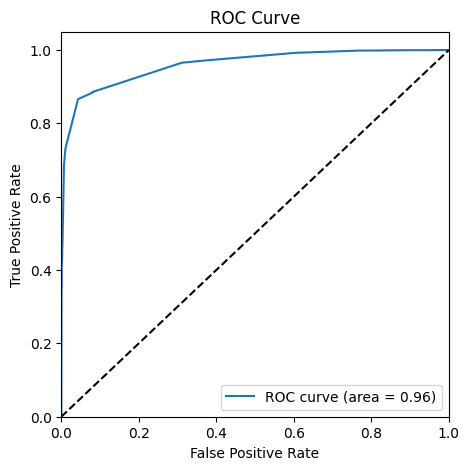

In [386]:
fpr, tpr, thresholds, auc_score = roc_auc_analysis(y_train_pred_df["Actual"], y_train_pred_df["Prediction_prob"])

The area under the curve of the ROC is 0.96. Hence, the model seems to be a good one.

## Model Stability: 5 - fold Cross validation

In [387]:
from sklearn.model_selection import cross_validate

logit_model = LogisticRegression(random_state = 94)

scoring = ['accuracy','precision', 'recall']
scores = cross_validate(logit_model, X_train, y_train, scoring=scoring)
sorted(scores.keys())

['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall']

In [388]:
cross_validation_scores = pd.DataFrame(scores)[["test_accuracy", "test_precision", "test_recall"]]
cross_validation_scores = cross_validation_scores.rename(columns = {"test_accuracy":"Accuracy", "test_precision":"Precision", "test_recall":"Recall"})

In [389]:
cross_validation_scores

,Accuracy,Precision,Recall
0,0.938590,0.938462,0.897059
1,0.938590,0.926966,0.909926
2,0.914106,0.911937,0.856618
3,0.928073,0.933202,0.873162
4,0.925978,0.936255,0.863971


In [390]:
cross_validation_scores.describe().loc[['mean', 'std']]

,Accuracy,Precision,Recall
mean,0.929067,0.929365,0.880147
std,0.010195,0.010659,0.022566




*   The performance metrics are atable across all runs
*   Recall can be improved. And as expected, it shows the conversion rate is above 80% as per CEO’s vision
*   The ROC AUC is 0.96 which suggests that the model is a good one



## Optimal cut-off for improve model performance

In [391]:
cuts = [float(x)/10 for x in range(10)]
for i in cuts:
    y_train_pred_df[i]= y_train_pred_df["Prediction_prob"].map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Prospect ID,Actual,Prediction_prob,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,5402,0,0.007671,0,1,0,0,0,0,0,0,0,0,0
1,1873,0,0.064371,0,1,0,0,0,0,0,0,0,0,0
2,6978,1,0.676973,1,1,1,1,1,1,1,1,0,0,0
3,8110,1,0.970549,1,1,1,1,1,1,1,1,1,1,1
4,2599,0,0.190590,0,1,1,0,0,0,0,0,0,0,0


In [392]:
cutoff_analysis = pd.DataFrame( columns = ['prob_cutoff','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

for i in cuts:
    cm = confusion_matrix(y_train_pred_df["Actual"], y_train_pred_df[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total


    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])

    cutoff_analysis.loc[i] =[ i ,accuracy,sensitivity,specificity]

print(cutoff_analysis)

     prob_cutoff  accuracy  sensitivity  specificity
0.0          0.0  0.379782     1.000000     0.000000
0.1          0.1  0.794192     0.965074     0.689554
0.2          0.2  0.906590     0.885662     0.919406
0.3          0.3  0.922368     0.866176     0.956776
0.4          0.4  0.922368     0.866176     0.956776
0.5          0.5  0.922368     0.866176     0.956776
0.6          0.6  0.922368     0.866176     0.956776
0.7          0.7  0.891231     0.730882     0.989419
0.8          0.8  0.890952     0.730147     0.989419
0.9          0.9  0.875314     0.682721     0.993246


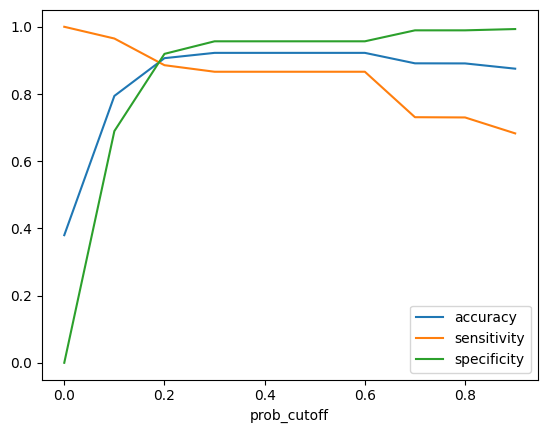

In [393]:
cutoff_analysis.plot.line(x='prob_cutoff', y=['accuracy','sensitivity','specificity'])
plt.show()

A cutoff of 0.2 seems very good from the above analysis

## Precision Recall Curve

In [394]:
p, r, thresholds = precision_recall_curve(y_train_pred_df["Actual"], y_train_pred_df["Prediction_prob"])

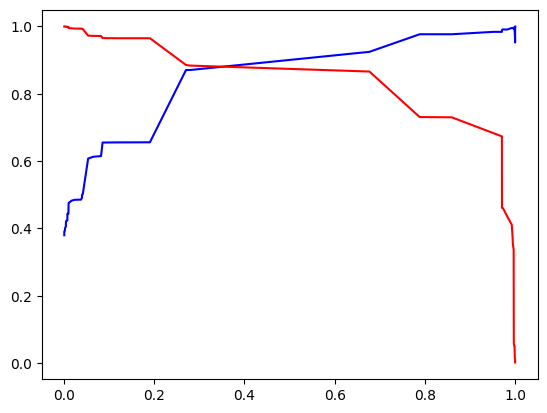

In [395]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

By the precision-recall curve analysis - 0.35 seems a good cutoff.

Lets check the performance of both these values on train and test dataset

### Train data scoring on cutoff 0.2 and 0.35

In [396]:
binary_class_model_performance(actuals = y_train_pred_df["Actual"], predictions = [1 if prob > 0.2 else 0 for prob in y_train_pred_df["Prediction_prob"].values], prediction_probs = y_train_pred_df["Prediction_prob"])

Confusion Matrix
[[4084  358]
 [ 311 2409]]


Accuracy: 0.9065903378944429


Precision: 0.8706179978315866


Recall or Sensitivity (TPR): 0.8856617647058823


Specificity: 0.9194056731202161


ROC_AUC_score: 0.9599493554175385


---------------------------------------------------------------------------


In [397]:
binary_class_model_performance(actuals = y_train_pred_df["Actual"], predictions = [1 if prob > 0.35 else 0 for prob in y_train_pred_df["Prediction_prob"].values], prediction_probs = y_train_pred_df["Prediction_prob"])

Confusion Matrix
[[4250  192]
 [ 364 2356]]


Accuracy: 0.9223680536163082


Precision: 0.9246467817896389


Recall or Sensitivity (TPR): 0.8661764705882353


Specificity: 0.9567762269248087


ROC_AUC_score: 0.9599493554175385


---------------------------------------------------------------------------


The ROC_AUC_score for both will be same, since its the same model.

The performance of 0.35 cut-off is marginally good since it had better accuracy, precision, specificity than 0.2 cut-off model. It is slightly off in recall, but thats fine. Since, counting a lead as potential conversion case even if may not is better than leaving a potential conversion case out.

**We will go with cut off 0.35**

In [398]:
y_train_pred_df["final_predictions"] = [1 if prob > 0.35 else 0 for prob in y_train_pred_df["Prediction_prob"].values]

In [399]:
y_train_pred_df[["Prospect ID", "Actual", "Prediction_prob", "final_predictions"]]

,Prospect ID,Actual,Prediction_prob,final_predictions
0,5402,0,0.007671,0
1,1873,0,0.064371,0
2,6978,1,0.676973,1
3,8110,1,0.970549,1
4,2599,0,0.190590,0
...,...,...,...,...
7157,7037,1,0.676973,1
7158,1429,0,0.190590,0
7159,1465,0,0.041859,0
7160,6550,1,0.992477,1


In [415]:
y_train_pred_df["Lead_Score"] = round(y_train_pred_df["Prediction_prob"]*100,2)

In [416]:
y_train_pred_df

,Prospect ID,Actual,Prediction_prob,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predictions,Lead_Score
0,5402,0,0.007671,0,1,0,0,0,0,0,0,0,0,0,0,0.77
1,1873,0,0.064371,0,1,0,0,0,0,0,0,0,0,0,0,6.44
2,6978,1,0.676973,1,1,1,1,1,1,1,1,0,0,0,1,67.70
3,8110,1,0.970549,1,1,1,1,1,1,1,1,1,1,1,1,97.05
4,2599,0,0.190590,0,1,1,0,0,0,0,0,0,0,0,0,19.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7157,7037,1,0.676973,1,1,1,1,1,1,1,1,0,0,0,1,67.70
7158,1429,0,0.190590,0,1,1,0,0,0,0,0,0,0,0,0,19.06
7159,1465,0,0.041859,0,1,0,0,0,0,0,0,0,0,0,0,4.19
7160,6550,1,0.992477,1,1,1,1,1,1,1,1,1,1,1,1,99.25


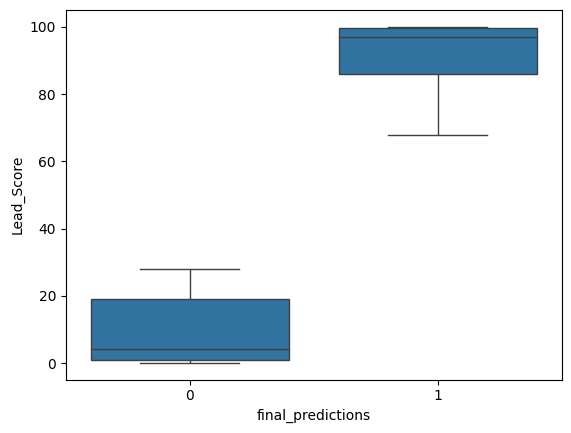

In [418]:
sns.boxplot(x = 'final_predictions', y = 'Lead_Score', data = y_train_pred_df)
plt.savefig("Lead Score Distribution of Train Data.png")
plt.show()

### Test data scoring on cutoff 0.2 and 0.35

In [400]:
# Making test data ready for scoring

# Scaling Numerical columns
scaler.fit(X_test[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Scoring Test data
y_test_pred = final_model.predict(sm.add_constant(X_test[selected_col_m2]))
y_test_pred = y_test_pred.values.reshape(-1)

In [401]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_test_pred_df = pd.DataFrame({'Actual':y_test.values, 'Prediction_prob':y_test_pred})
y_test_pred_df.insert(0, 'Prospect ID', y_test.index)
y_test_pred_df.head()

,Prospect ID,Actual,Prediction_prob
0,5484,0,0.002765
1,4038,1,0.676973
2,1913,1,0.676973
3,4875,1,0.859437
4,1789,0,0.190590


**Going with 0.35 as default cut-off for test dataset**

In [402]:
binary_class_model_performance(actuals = y_test_pred_df["Actual"], predictions = [1 if prob > 0.35 else 0 for prob in y_test_pred_df["Prediction_prob"].values], prediction_probs = y_test_pred_df["Prediction_prob"])

Confusion Matrix
[[1060   56]
 [  88  587]]


Accuracy: 0.9195979899497487


Precision: 0.9129082426127527


Recall or Sensitivity (TPR): 0.8696296296296296


Specificity: 0.9498207885304659


ROC_AUC_score: 0.9575136067967609


---------------------------------------------------------------------------


**Just checking the performace of 0.2 cut-off also**

In [403]:
binary_class_model_performance(actuals = y_test_pred_df["Actual"], predictions = [1 if prob > 0.2 else 0 for prob in y_test_pred_df["Prediction_prob"].values], prediction_probs = y_test_pred_df["Prediction_prob"])

Confusion Matrix
[[995 121]
 [ 75 600]]


Accuracy: 0.8905639307649358


Precision: 0.8321775312066574


Recall or Sensitivity (TPR): 0.8888888888888888


Specificity: 0.8915770609318996


ROC_AUC_score: 0.9575136067967609


---------------------------------------------------------------------------


**Even in the test dataset, 0.35 cutoff is much better than 0.2**

In [404]:
y_test_pred_df["final_predictions"] = [1 if prob > 0.35 else 0 for prob in y_test_pred_df["Prediction_prob"].values]

In [410]:
y_test_pred_df["Lead_Score"] = round(y_test_pred_df["Prediction_prob"]*100,2)

In [411]:
y_test_pred_df

,Prospect ID,Actual,Prediction_prob,final_predictions,Lead_Score
0,5484,0,0.002765,0,0.28
1,4038,1,0.676973,1,67.70
2,1913,1,0.676973,1,67.70
3,4875,1,0.859437,1,85.94
4,1789,0,0.190590,0,19.06
...,...,...,...,...,...
1786,1500,1,0.190590,0,19.06
1787,3460,0,0.010414,0,1.04
1788,6997,1,0.676973,1,67.70
1789,5216,0,0.082272,0,8.23


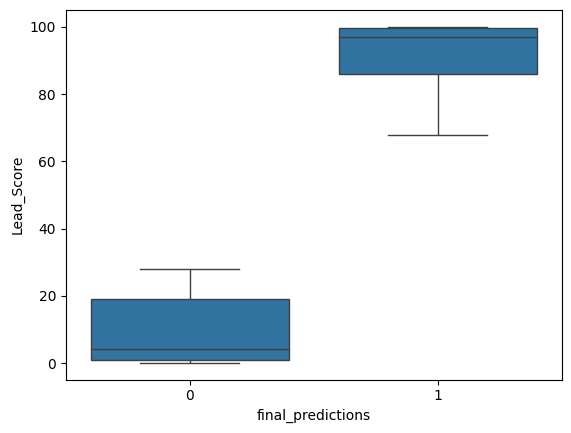

In [419]:
sns.boxplot(x = 'final_predictions', y = 'Lead_Score', data = y_test_pred_df)
plt.savefig("Lead Score Distribution of Test Data.png")
plt.show()